## Ноутбук по астрономии. Введение



Добро пожаловать, исследователь! Здесь ты найдешь примеры, которые мы разбирали на лекции и сможешь самостоятельно потыкать код!

**Презентация** находится здесь - [здесь](https://drive.google.com/file/d/1NyMc7uvO6I0DZyXcxUrQgGBwOwgotNhV/view?usp=sharing)

Перед началом работы скачай из [моего архива](https://drive.google.com/drive/folders/15ZlD-SC7bA1__uv1-rkCGe37GogBsQ9D?usp=sharing) папку `astronomy python` и помести ее в корень твоего гугл диска, затем запускай ноутбук. Помни, что каждая ячейка - отдельная задача, за исключением пункта о деконволюции.


In [ ]:
#для начала работы установи эти пакеты
pip install astropy
pip install photutils
pip install astroml
pip install latex
pip install lightkurve
pip install TESS_PRF
pip install tess-point
pip install git+https://github.com/CheerfulUser/TESSreduce.git
pip install astroquery
pip install Galsim

In [ ]:
#установки ноутбук с файлами для работы и создай на верхнем уровне папку "astronomy python"!
from google.colab import drive
drive.mount('/content/drive')

#/content/drive/MyDrive/astronomy python/ - это будет основной путь к файлам на твоем диске

Mounted at /content/drive


#### **Полезные ноутбуки и ссылки**
Классификация переменных звезд - [здесь](https://github.com/Amirosein/Variable-Stars-Classification)

RNN для переменных звезд - [здесь](https://deepai.org/publication/scalable-end-to-end-recurrent-neural-network-for-variable-star-classification)

Классификация (CNN) космических объектов (галактики, сверхновые, переменные звезды, астероиды) и поиск кандидатов в сверхновые - [здесь](https://colab.research.google.com/github/alercebroker/usecases/blob/master/notebooks/ADASS_XXXII_Nov2022_tutorial/ALeRCE_ML_Stamp_Classifier.ipynb)

Классификация галактик и подбор датасета - [здесь](https://github.com/nunorc/galaxy-convnet), [здесь](https://github.com/burke86/astro_rcnn) и [здесь](https://www.astroml.org/astroML-notebooks/chapter9/astroml_chapter9_Deep_Learning_Classifying_Astronomical_Images.html) с проектом astroml

Дриззлинг (drizzle) - [здесь](https://github.com/spacetelescope/drizzle)

Хакатон от SOHO - [здесь](https://science.nasa.gov/science-research/heliophysics/winners-selected-for-the-nasa-soho-comet-search-with-artificial-intelligence-open-science-challenge/);
Если вы хотите заняться поиском околосолнечных комет - [здесь](https://sungrazer.nrl.navy.mil/soho_guide)

**Крутейший проект** - [здесь](https://github.com/DmitryUlyanov/deep-image-prior)

Считаем грав. линзирование - [здесь](https://www.space.com/gravitational-lens-treasure-trove-discovered)
#### **Полезные статьи**

Формулы из ноутбука во многом взяты - [отсюда](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B8%D1%86%D0%B0)

Астрометрия звезд - [здесь](https://arxiv.org/pdf/2306.16519)

Адаптивная бинаризация - [здесь](https://habr.com/ru/articles/278435/)

О влиянии Солнца на биосферу Земли - [здесь](https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BC%D0%BD%D0%BE%D0%B5_%D1%8D%D1%85%D0%BE_%D1%81%D0%BE%D0%BB%D0%BD%D0%B5%D1%87%D0%BD%D1%8B%D1%85_%D0%B1%D1%83%D1%80%D1%8C)

Переоткрываем законы гравитации - [здесь](https://arxiv.org/pdf/2202.02306) и рассчитываем орбиты спутников - [здесь](https://arxiv.org/html/2207.08993v4)

Еще AI в астрономии - [здесь](https://www.skyatnightmagazine.com/space-science/artificial-intelligence-astronomy)

Гайд по астрометрии - [здесь](https://www.aavso.org/sites/default/files/publications_files/ccd_photometry_guide/CCDPhotometryGuide.pdf)

*W. Romanishin An Introduction to Astronomical Photometry Using CCDs;*

*Berry, Burnell The Handbook of astronomical image processing* - астрофотография.

*Гоффмейстер, Рихтер, Венцель, Переменные звёзды.* - классика литературы
по переменным звёздам.

Сложение кадров в стэк - [здесь](https://edinstvo.org/page/stacking-deepskystacker)



# **Раздел 1. Звезды**

## 1. Найдем звезды на изображении при помощи чистой математики!

В этом ноутбуке перед нами простая задача - не используя сторонние библиотеки, связанные с распознаванием чего-либо и компьютерным зрением, при помощи обыкновенный математики мы должны найти звезды на картинке в научном формате - fits.

Здесь нам поможет оценка FWHM - средней полуширины на отдельных участках поля

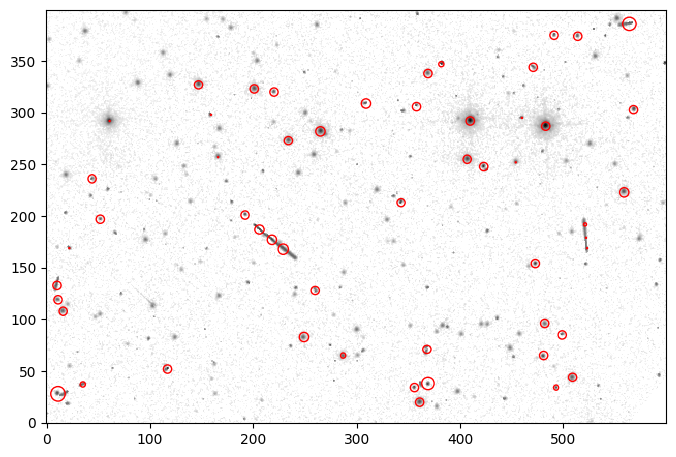

In [ ]:
from astropy.io import fits
import numpy as np
from scipy.ndimage import gaussian_filter, gaussian_filter1d
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Чтение данных из файла fits
fits_file = fits.open('/content/drive/MyDrive/astronomy python/ngc1261.fits')
image_data = fits_file[0].data

# Выбор участка большого изображения
section1 = image_data[2250:2650, 5150:5750]

# Применение гауссова фильтра для сглаживания изображения
smoothed_data = gaussian_filter(section1, sigma=2)

# Нахождение пиков на изображении
peaks = peak_local_max(smoothed_data, min_distance=5, threshold_abs=100)

# Определение полуширины для каждой звезды
def find_fwhm(data, peak):
    y, x = peak
    intensity_profile = data[y, :]
    smoothed_profile = gaussian_filter1d(intensity_profile, sigma=2)
    half_max_intensity = smoothed_profile.max() / 2
    left_idx = np.where(smoothed_profile[:x] <= half_max_intensity)[0][-1]
    right_idx = np.where(smoothed_profile[x:] <= half_max_intensity)[0][0] + x
    return right_idx - left_idx

fwhms = [find_fwhm(smoothed_data, peak) for peak in peaks]

# Увеличение яркости изображения
brightened_data = section1 * 1.5  # Увеличиваем яркость на 50%

# Создание нового изображения с обведенными звездами, инвертированными цветами и увеличенной яркостью
plt.figure(figsize=(8, 8))
plt.imshow(brightened_data, cmap='gray_r')

for peak, fwhm in zip(peaks, fwhms):
    circle = Circle((peak[1], peak[0]), fwhm/2, color='r', fill=False)
    plt.gca().add_patch(circle)

plt.imshow(section1, cmap='Greys', norm=LogNorm(), origin = 'lower', interpolation='nearest')


## 2. Сделаем то же самое, но с более классной библиотекой!

На лекции я представил вам модуль astropy - половина математических действий в астрономии осуществляется через него. Давайте воспользуемся стандартными инструментами матстата, оценим среднее, медианное и среднеквадратичное отклонение, оценим так же FWHM и найдем звезды на изображении

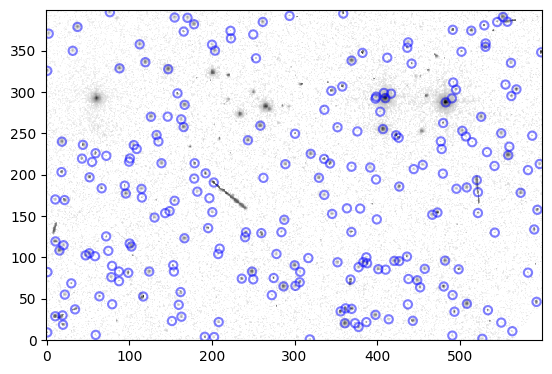

In [ ]:
from astropy.io import fits
fits_file = fits.open('/content/drive/MyDrive/astronomy python/ngc1261.fits')
image_data = fits_file[0].data
# выбираем регион огромного изображения, с которым будем работать
section1 = image_data[2250:2650, 5150:5750]
#находим mean (среднее), median (медианное), and среднеквадратичное отклонение
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(section1,sigma=3.0)
# ставим модуль для поиска звезд
from photutils.detection import DAOStarFinder
#найдем звезды, которые имеют полную FWHM около 3 пикселей и
#находятся как минимум на 5 сигм (σ) выше уровня фона.
daofind = DAOStarFinder(fwhm = 3.0, threshold = 5.0*std)
# display data with matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.aperture import CircularAperture
mask = np.zeros(section1.shape, dtype=bool)
# select regions to mask (y:y,x:x)
mask[260:320,40:80] = True
mask[230:350,170:240] = True
mask[260:340,240:320] = True
mask[250:330,420:470] = True
# define sources table
sources = daofind(section1-median,mask=mask)
xpix = sources['xcentroid']
ypix = sources['ycentroid']
# plot new table
positions = np.transpose((xpix,ypix))
apertures = CircularAperture(positions,r=5.0)
plt.imshow(section1, cmap='Greys', norm=LogNorm(), origin = 'lower', interpolation='nearest')
apertures.plot(color='blue',lw=1.5, alpha = 0.5);

## 3. Построим тензорное представление!

Работая с FWHM, мы поняли, что любое изображение можно разложить на три цветовых канала и для каждый монохромный канал представить в виде тензора, где по оси z будет яркость, а на плоскости xy координаты. Анализируя распределение яркостей на поле изображения, мы можем построить его гистограммное представление

Оценка FWHM: 6.333333333333333


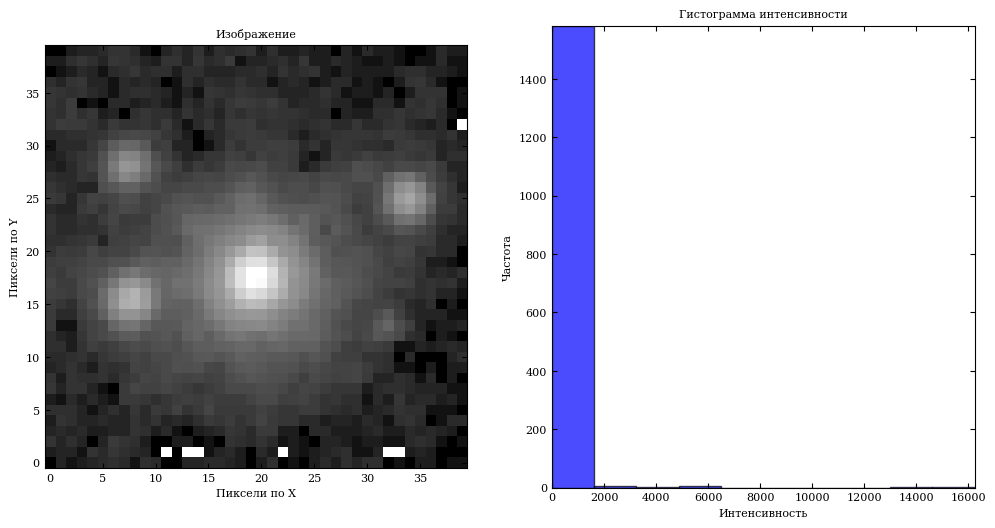

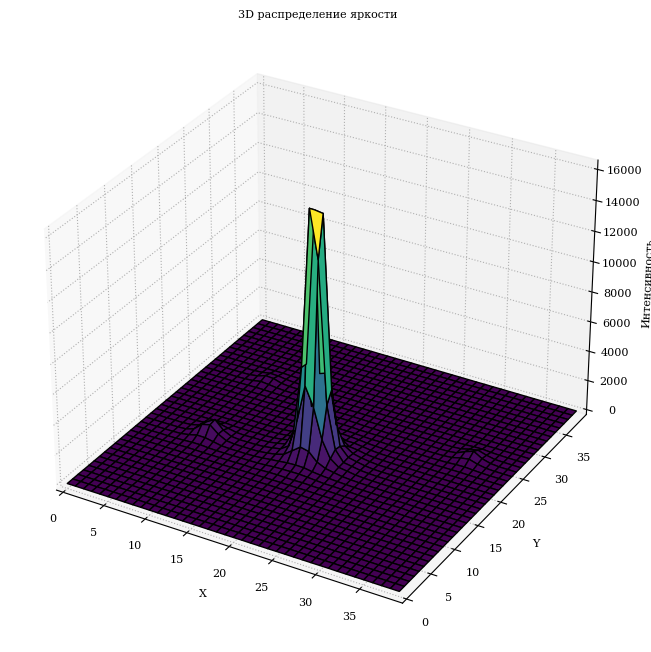

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter, gaussian_filter1d
from skimage.feature import peak_local_max
from matplotlib.colors import LogNorm

# Открытие файла fits
fits_file = fits.open('/content/drive/MyDrive/astronomy python/sample_star.fit')
image_data = fits_file[0].data

# Определение функции для нахождения FWHM
def find_fwhm(data):
    smoothed_data = gaussian_filter(data, sigma=2)
    peaks = peak_local_max(smoothed_data, min_distance=5, threshold_abs=100)
    fwhms = [calculate_fwhm(smoothed_data, peak) for peak in peaks]
    return np.mean(fwhms)

# Расчет FWHM
def calculate_fwhm(data, peak):
    y, x = peak
    intensity_profile = data[y, :]
    smoothed_profile = gaussian_filter1d(intensity_profile, sigma=2)
    half_max_intensity = smoothed_profile.max() / 2
    left_idx = np.where(smoothed_profile[:x] <= half_max_intensity)[0][-1]
    right_idx = np.where(smoothed_profile[x:] <= half_max_intensity)[0][0] + x
    return right_idx - left_idx

# Оценка FWHM
fwhm = find_fwhm(image_data)
print("Оценка FWHM:", fwhm)

# Построение графика изображения и гистограммы
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image_data, cmap='gray', origin='lower', norm=LogNorm())
ax1.set_title('Изображение')
ax1.set_xlabel('Пиксели по X')
ax1.set_ylabel('Пиксели по Y')

ax2.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
ax2.set_title('Гистограмма интенсивности')
ax2.set_xlabel('Интенсивность')
ax2.set_ylabel('Частота')

plt.show()

# Создание трехмерного представления распределения яркости
x = np.arange(image_data.shape[1])
y = np.arange(image_data.shape[0])
X, Y = np.meshgrid(x, y)
Z = image_data

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Интенсивность')
ax.set_title('3D распределение яркости')
plt.show()


## 4. Построим график FWHM и распределение Гаусса!

Давайте построим сечением в профиль наше тензорное представление и получим тот самый график FWHM - это величина дискретная, следовательно, ее лучше всего описывает распределение Пуассона, но в рамках задачи с определенными допусками мы можем его аппроксимировать и представить в виде хрестоматийного нормального (Гауссова) распределения.

**Теорема Котельникова**, также известная как теорема о выборке или теорема о дискретизации, является фундаментальным результатом в области сигнальной обработки и связанной с темой преобразования Фурье.

Эта теорема утверждает, что если сигнал имеет ограниченный спектр в частотной области, то он может быть полностью восстановлен из его выборок, взятых с определенной частотой, превышающей удвоенную наивысшую частоту в спектре сигнала. Иными словами, чтобы корректно восстановить непрерывный сигнал из его дискретных выборок, необходимо, чтобы частота выборки была по крайней мере в два раза выше максимальной частоты в сигнале. При этом мы не можем увеличить частоту дискретизации выше, чем в 3 раза от частоты сигнала: новой информации мы не получим, зато будем лучше учитывать отклонения $\sigma$, что не в наших интересах.

Итого: оптимальная частота дискретизации от х2 до х3 частоты исходного аналогового сигнала.

Оценка FWHM для самой яркой звезды: 9


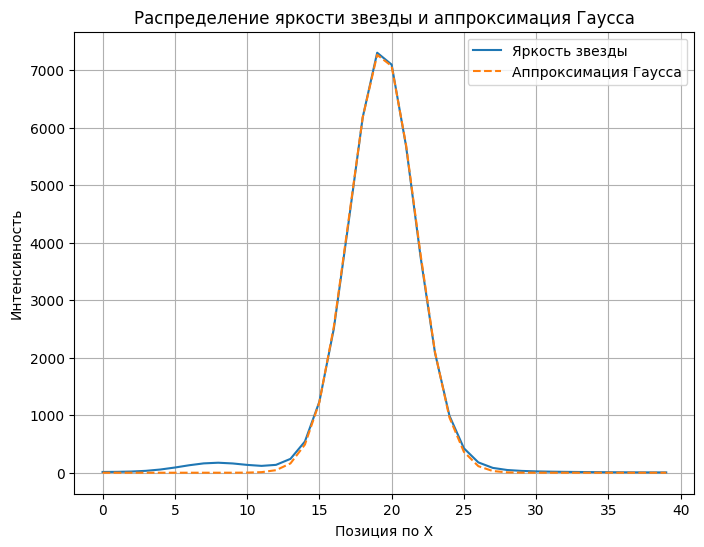

In [ ]:
from astropy.io import fits
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_filter1d
from skimage.feature import peak_local_max
from scipy.optimize import curve_fit

# Открытие файла fits
fits_file = fits.open('/content/drive/MyDrive/astronomy python/sample_star.fit')
image_data = fits_file[0].data

# Нахождение пика с максимальной интенсивностью
max_peak = np.unravel_index(np.argmax(image_data, axis=None), image_data.shape)

# Определение полуширины для самой яркой звезды
def find_fwhm(data, peak):
    smoothed_data = gaussian_filter(data, sigma=2)
    fwhm = calculate_fwhm(smoothed_data, peak)
    return fwhm

# Расчет полуширины
def calculate_fwhm(data, peak):
    y, x = peak
    intensity_profile = data[y, :]
    smoothed_profile = gaussian_filter1d(intensity_profile, sigma=2)
    half_max_intensity = smoothed_profile.max() / 2
    left_idx = np.where(smoothed_profile[:x] <= half_max_intensity)[0][-1]
    right_idx = np.where(smoothed_profile[x:] <= half_max_intensity)[0][0] + x
    return right_idx - left_idx

# Оценка FWHM для самой яркой звезды
fwhm = find_fwhm(image_data, max_peak)
print("Оценка FWHM для самой яркой звезды:", fwhm)

# Выделение яркости звезды в виде одномерного массива данных
y_peak, x_peak = max_peak
intensity_profile = image_data[y_peak, :]
smoothed_profile = gaussian_filter1d(intensity_profile, sigma=2)

# Определение координат для построения графика
x_values = np.arange(len(smoothed_profile))

# Определение функции Гаусса
def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

# Подгонка данных под функцию Гаусса
popt, _ = curve_fit(gaussian, x_values, smoothed_profile, p0=[1, x_peak, fwhm/2])

# Построение графика яркости и аппроксимации Гаусса
plt.figure(figsize=(8, 6))
plt.plot(x_values, smoothed_profile, label='Яркость звезды')
plt.plot(x_values, gaussian(x_values, *popt), label='Аппроксимация Гаусса', linestyle='--')
plt.xlabel('Позиция по X')
plt.ylabel('Интенсивность')
plt.title('Распределение яркости звезды и аппроксимация Гаусса')
plt.legend()
plt.grid(True)
plt.show()


Обратите внимание, что мы работаем с файлами формата FITS - научный формат данных, где в header файла содержится значительное количество полезной информации о снимке. Очень важно соблюдать битность каждого файла и не путаться в разрешениях!

## Сделаем анализ SNR звезд!

Здесь мы снова применим уже знакомые нам инструменты для вычисления главного показателя "качества" изображения, характеризующего фотометрические параметры изображения, - SNR (соотношение сигнала к шуму, то есть насколько больше у нас нужного сигнала, чем паразитного), а не его астрономические, как это делал FWHM (используется для работы с дифракционным пределом, оценки seeing (спокойность и прозрачность атмосферы в заданной точке), оценки сферических аббераций и иных оптических искажений телескопа)

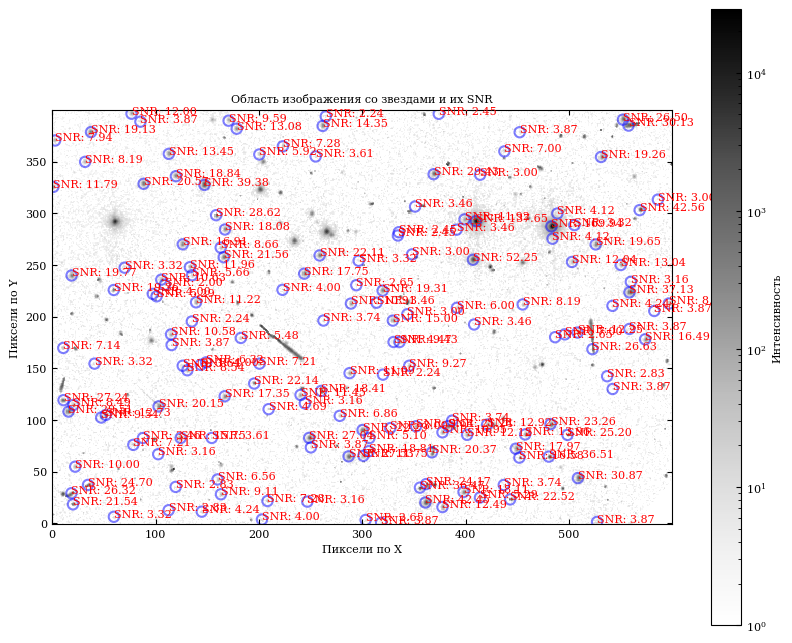

In [ ]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Открытие файла fits
fits_file = fits.open('/content/drive/MyDrive/astronomy python/ngc1261.fits')
image_data = fits_file[0].data

# Выбор региона изображения
section1 = image_data[2250:2650, 5150:5750]

# Расчет среднего, медианы и стандартного отклонения
mean, median, std = sigma_clipped_stats(section1, sigma=3.0)

# Поиск звезд с помощью DAOStarFinder
daofind = DAOStarFinder(fwhm=5.0, threshold=5.0*std)
sources = daofind(section1 - median)

# Определение функции для расчета SNR
def calculate_snr(data, source, background):
    intensity = source['peak'] - background
    noise = np.sqrt(source['peak'] + background)
    snr = intensity / noise
    return snr

# Создание маски для областей, которые нужно исключить из анализа
mask = np.zeros(section1.shape, dtype=bool)
mask[260:320, 40:80] = True
mask[230:350, 170:240] = True
mask[260:340, 240:320] = True
mask[250:330, 420:470] = True

# Расчет SNR для каждой звезды и построение графика
xpix = sources['xcentroid']
ypix = sources['ycentroid']
snrs = []

plt.figure(figsize=(10, 8))
plt.imshow(section1, cmap='Greys', norm=LogNorm(), origin='lower', interpolation='nearest')

for i in range(len(sources)):
    source = sources[i]
    x, y = xpix[i], ypix[i]
    if not mask[int(y), int(x)]:
        apertures = CircularAperture((x, y), r=5.0)
        apertures.plot(color='blue', lw=1.5, alpha=0.5)
        snr = calculate_snr(section1, source, median)
        snrs.append(snr)
        plt.text(x, y, f'SNR: {snr:.2f}', color='red')

plt.colorbar(label='Интенсивность')
plt.title('Область изображения со звездами и их SNR')
plt.xlabel('Пиксели по X')
plt.ylabel('Пиксели по Y')
plt.show()


## 5. Теперь сделаем апертурную фотометрию!



Апертурная фотометрия - это метод измерения яркости астрономических объектов путем суммирования света, попадающего в определенную апертуру (область наблюдения) вокруг объекта на изображении.


---



Здесь мы определим звезды на снимке, обозначим их, и введем специальные апертурные круги для определения фона вокруг каждой звезды.

Добавим параметры суммы апертуры - сумма данных об объекте в апертуре масштабированная по количеству фотонов на единицу данных и коэффициентам экспозиции и фон

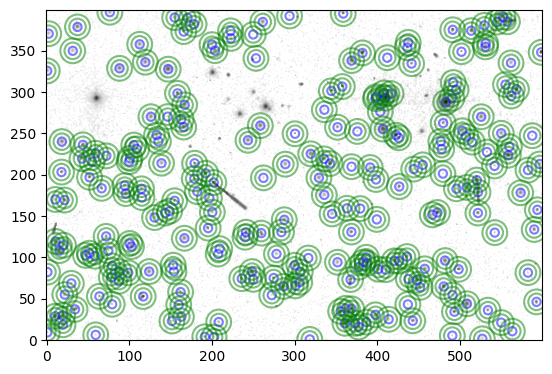

In [ ]:
from photutils.aperture import CircularAnnulus, CircularAperture, ApertureStats, aperture_photometry

#зададим круги для фона
annulus_aperture = CircularAnnulus(positions, r_in=10, r_out=15)

#построим круги
plt.figure()
plt.imshow(section1, cmap='Greys', norm = LogNorm(), origin = 'lower')
apertures.plot(color='blue',lw=1.5, alpha = 0.5);
annulus_aperture.plot(color='green',lw=1.5,alpha=0.5);
plt.show()

In [ ]:
aperstats = ApertureStats(section1, annulus_aperture)
bkg_mean = aperstats.mean
aperture_area = apertures.area_overlap(section1)
total_bkg = bkg_mean*aperture_area

#сделаем фотометрию!
star_data = aperture_photometry(section1, apertures)

#внесем в результирующую таблицу фотометрии фон
star_data['total_bkg'] = total_bkg

#вывод
for col in star_data.colnames:
    star_data[col].info.format = '%.8g'
star_data.pprint()

 id  xcenter    ycenter   aperture_sum total_bkg 
       pix        pix                            
--- ---------- ---------- ------------ ----------
  1  318.46944 0.55300125    73.486366 -2.3676931
  2  527.17645  1.2792742    303.24214  59.315913
  3  191.46528  3.7020282    646.82736  17.183478
  4  202.71573  3.4014466    115.52431  203.39575
  5  490.89397  5.1303846    19.561524 -11.175626
  6    59.5149  6.0011993    5.5503375 -34.906585
  7 0.95596716  8.9967015    111.12054 -19.102524
  8  563.50303  10.471816   0.46693871  -34.18792
  9  377.50981  15.590414    1259.6102  213.69209
 10  19.926834  18.291263    2823.7584  2882.0524
...        ...        ...          ...        ...
236  178.46738  381.76826    1618.4839  167.64463
237  261.61466    384.572    1774.3376 -17.741228
238  545.18381  384.43958    1385.6104  2081.0038
239  557.51001  384.79528    10484.918  312.75677
240  155.01447  389.89157    670.36813  137.50906
241  170.54574  389.54389    841.24221  416.31074


В таблице содержатся данные о координатах звезд, о размере апертурного диска и значения интенсивности вычисленного фона в специальных кругах

## 6. Посчитаем поверхностную яркость галактики

В этой задаче мы построим пару графиков (в полуупрощенном виде), используя апертурную фотометрию эллиптической галактики M89.

Мы собираемся сделать быструю и грязную версию апертурной фотометрии, поэтому мы просто используем круговые апертуры с центром на каждой галактике. Центральные RA (прямое восхождение) и Deс (склонение) для галактики таковы:
$\rm{RA} = 24.174050, \rm{Dec} = 15.783461$

Я сделал одну апертуру с радиусом в пять угловых секунд для M89.

Мы получили параметр `aperture sum`. Это будет поток для центра этой галактики. Мы хотим измерить поверхностную яркость как функцию радиуса, поэтому нам понадобится несколько апертур, каждая из которых будет увеличиваться в размере. Я пошел дальше и сделал набор для M89. Для этого я использовал цикл for. Циклы for повторяют задачу определенное количество раз. Итак, в этом цикле for я сказал python построить круги с радиусами для каждого значения в нашем массиве радиусов. Затем я говорю python извлечь поток в этом круге. Все остается неизменным для каждого шага, за исключением размера радиуса. На последнем этапе я добавляю новое значение потока в массив с помощью команды "append". Append берет существующий массив флюсов и вставляет наше новое значение в конец.

Нас интересует поверхностная яркость объекта - то есть ее распределение на некую площадь, в данном случае распределение светимости по площади источника света.



<ipython-input-10-98100a861de7>:6: DeprecationWarning: `photutils.SkyCircularAperture` is a deprecated alias for `photutils.aperture.SkyCircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import SkyCircularAperture` to silence this warning.
  from photutils import (SkyCircularAperture, aperture_photometry)
<ipython-input-10-98100a861de7>:6: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import (SkyCircularAperture, aperture_photometry)


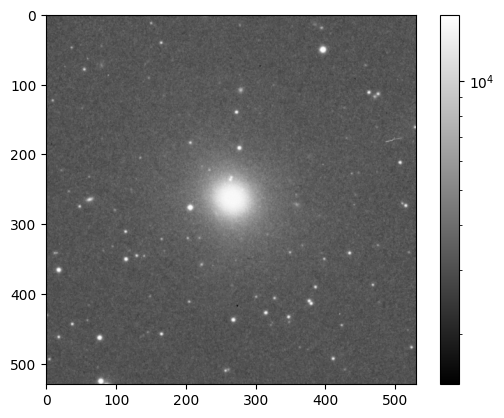

In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import (SkyCircularAperture, aperture_photometry)
from astropy.wcs.wcs import WCS
from matplotlib import colors

elliptical_file = '/content/drive/MyDrive/astronomy python/M89_elliptical.fits'
hdu_e = fits.open(elliptical_file)
e_data = hdu_e[0].data

plt.imshow(e_data, cmap='gray', norm=colors.LogNorm())
plt.colorbar()


Changed DATE-OBS from '11/03/56          ' to '1956-03-11''. [astropy.wcs.wcs]
Changed DATE-OBS from '11/03/56          ' to '1956-03-11''.


   aperture_sum   
------------------
1552458.4798971443
[1.55245848e+06 3.48694370e+06 6.15424913e+06 1.32454454e+07
 2.16134134e+07 3.01097674e+07 3.83033805e+07 4.63695370e+07
 5.45792846e+07 6.31008575e+07 7.20690870e+07 1.24809422e+08]


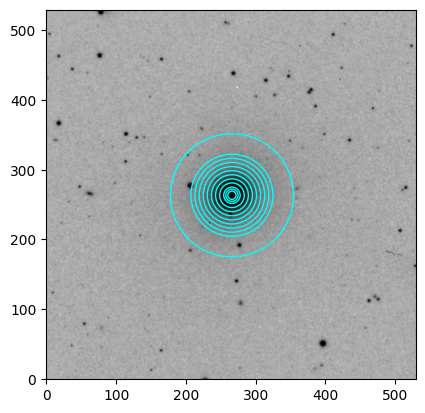

In [ ]:
e_ra = 188.9159
e_dec = 12.5563
e_nuc = SkyCoord(e_ra, e_dec, unit='deg', frame='icrs')
e_aperture = SkyCircularAperture(e_nuc, r=5.0 * u.arcsec)
wcs = WCS(hdu_e[0].header)
e_phot_table = aperture_photometry(e_data, e_aperture, wcs = wcs)
print(e_phot_table['aperture_sum'])



fig, ax = plt.subplots()
coords = wcs.wcs_world2pix(e_ra, e_dec, 0) #эта команда находит координаты пикселей x и y по заданным RA и Dec.
radius = [5.0, 10.0, 15.0, 20., 30., 40., 50., 60., 70., 80., 90., 100., 150.]
cdelt = 1.7 #преобразование угловых секунд в пиксель
rad_pix = [x/cdelt for x in radius]
flux = []
for i in range(len(rad_pix)):
    circle = plt.Circle((coords[0], coords[1]), rad_pix[i], color='cyan', fill=False)
    ax.add_artist(circle)
    e_aperture = SkyCircularAperture(e_nuc, r=radius[i] * u.arcsec)
    e_phot_table = aperture_photometry(e_data, e_aperture, wcs = wcs)
    flux = np.append(flux, e_phot_table['aperture_sum'])
ax.imshow(e_data, cmap='gray_r', norm=colors.LogNorm(), origin='lower')
print(flux)

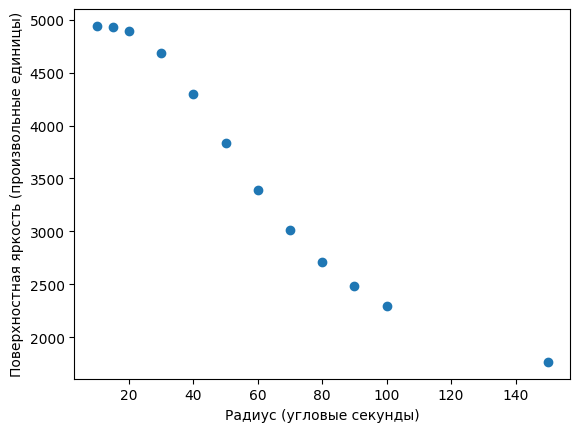

In [ ]:
area = [np.pi * x**2 for x in radius]
plt.scatter(radius, flux/area)
plt.xlabel('Радиус (угловые секунды)')
plt.ylabel('Поверхностная яркость (произвольные единицы)')
plt.show()

# **Раздел 2. Деконволюция**

Деконволюция или же обратная свертка - это процесс восстановления оригинального сигнала или распределения из искаженного или размытого сигнала. В контексте обработки сигналов, изображений или данных, деконволюция позволяет уменьшить или устранить эффекты размытия, вызванные различными факторами, такими как аппаратные ограничения, шум или неидеальные условия съемки.

Процесс деконволюции может быть представлен как обратная операция свертки. Во время свертки исходный сигнал или распределение изменяются с помощью функции свертки, что может вызвать размытие или искажение. Деконволюция возвращает исходный сигнал, стараясь уменьшить или отменить эти эффекты.

## Экстремальная деконцолюция

Экстремальная деконволюция (Extreme Deconvolution - XD) - это метод статистического анализа, используемый для оценки плотности вероятности данных, а также для выделения и моделирования кластеров в многомерных пространствах.

Основная идея метода XD заключается в том, чтобы моделировать наблюдаемые данные как суперпозицию нескольких наборов скрытых (невидимых) гауссовских распределений. Это позволяет учесть неоднородность и смешение различных кластеров в данных.

Процесс XD состоит из следующих шагов:

1.   Предположение о модели: выбирается параметрическая модель, которая описывает распределение данных. В XD обычно используется смесь многомерных гауссовских распределений.
2.   Оценка параметров модели: параметры модели, такие как средние значения, ковариационные матрицы и веса компонентов, оптимизируются с использованием методов, таких как максимизация правдоподобия.
3.    Предсказание: на основе полученной модели можно предсказать распределение для новых данных или сгенерировать новые образцы из распределения.



установите набор данных для работы LaTex

In [ ]:
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash

In [ ]:
!sudo apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

@pickle_results: using precomputed results from 'XD_toy.pkl'


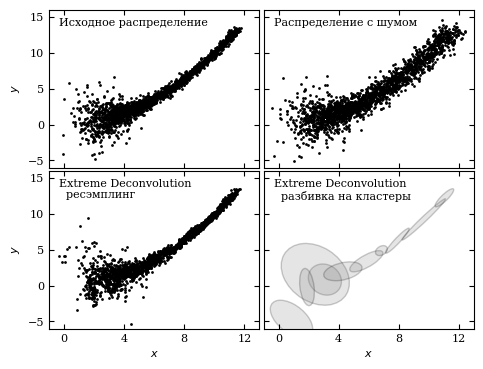

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

from astroML.utils.decorators import pickle_results
from astroML.density_estimation import XDGMM
from astroML.plotting.tools import draw_ellipse

#----------------------------------------------------------------------
# Эта функция настраивает настройки matplotlib для единообразия в ноутбуке.
# Обратите внимание, что при использовании usetex=True шрифты отображаются с помощью LaTeX. Это может
# привести к ошибке, если LaTeX не установлен в вашей системе. В таком случае,
# вы можете установить для usetex значение False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

# задаем датасет
N = 2000
np.random.seed(0)

# нагенерим случайных данных
x_true = (1.4 + 2 * np.random.random(N)) ** 2
y_true = 0.1 * x_true ** 2

# добавим разброса для более "правильного" распределения
dx = 0.1 + 4. / x_true ** 2
dy = 0.1 + 10. / x_true ** 2

x_true += np.random.normal(0, dx, N)
y_true += np.random.normal(0, dy, N)

# добавим шума для "наблюдаемого" распределения
dx = 0.2 + 0.5 * np.random.random(N)
dy = 0.2 + 0.5 * np.random.random(N)

x = x_true + np.random.normal(0, dx)
y = y_true + np.random.normal(0, dy)

# соединим результаты для подсчета
X = np.vstack([x, y]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
diag = np.arange(X.shape[-1])
Xerr[:, diag, diag] = np.vstack([dx ** 2, dy ** 2]).T


#посчитаем и сохраним результаты - обратите внимание на конструкцию с декоратором в коде
@pickle_results("XD_toy.pkl")
def compute_XD_results(n_components=10, max_iter=500):
    clf = XDGMM(n_components, max_iter=max_iter)
    clf.fit(X, Xerr)
    return clf


clf = compute_XD_results(10, 500)
sample = clf.sample(N)

#диаграмма
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(221)
ax1.scatter(x_true, y_true, s=4, lw=0, c='k')

ax2 = fig.add_subplot(222)
ax2.scatter(x, y, s=4, lw=0, c='k')

ax3 = fig.add_subplot(223)
ax3.scatter(sample[:, 0], sample[:, 1], s=4, lw=0, c='k')

ax4 = fig.add_subplot(224)
for i in range(clf.n_components):
    draw_ellipse(clf.mu[i], clf.V[i], scales=[2], ax=ax4,
                 ec='k', fc='gray', alpha=0.2)

titles = ["Исходное распределение", "Распределение с шумом",
          "Extreme Deconvolution\n  ресэмплинг",
          "Extreme Deconvolution\n  разбивка на кластеры"]

ax = [ax1, ax2, ax3, ax4]

for i in range(4):
    ax[i].set_xlim(-1, 13)
    ax[i].set_ylim(-6, 16)

    ax[i].xaxis.set_major_locator(plt.MultipleLocator(4))
    ax[i].yaxis.set_major_locator(plt.MultipleLocator(5))

    ax[i].text(0.05, 0.95, titles[i],
               ha='left', va='top', transform=ax[i].transAxes)

    if i in (0, 1):
        ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[i].set_xlabel('$x$')

    if i in (1, 3):
        ax[i].yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[i].set_ylabel('$y$')
#plt.title('Принцип работы экстремальной деконволюции', fontsize=14)
plt.show()

## Выполним свертку с функцией PSF

В этом ноутбуке мы возьмем с сайта проекта astroml распределение некой величины, смоделируем PSF (функцию рассеяния точки), применим к нему эту функцию, получим свертку и попробуем сделать обратную свертку.


---




Функция рассеяния точки (Point Spread Function - PSF) - это концепция, преимущественно используемая в области оптики и астрономии, характеризующая распределение света от точечного источника после его прохождения через оптическую систему.

В астрономии PSF описывает, как точечный источник света (например, звезда или галактика) отображается на изображении с помощью телескопа или другой оптической системы. PSF зависит от множества факторов, включая оптические аберрации, дифракцию, эффекты атмосферы и другие характеристики телескопа.

Основные характеристики PSF включают форму и размер размытия, а также интенсивность света в различных областях изображения.

Filename: /root/.astropy/cache/download/url/8da27de5aa6b0db633441e82715bedf3/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  NN_EMISSIVITY_I_LOBE_150.0MHZ    1 ImageHDU        23   (1024, 1452)   float64   


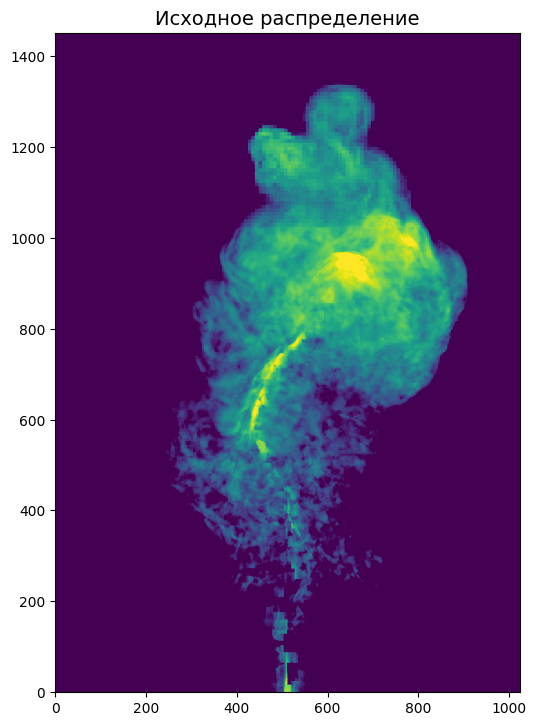

In [ ]:
from astropy.utils.data import download_file
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from astropy.convolution import Gaussian2DKernel
from astropy.modeling.models import Lorentz1D
from astropy.convolution import convolve_fft

import matplotlib.pyplot as plt
import numpy as np

#возьмем образец распределения с сайта
%matplotlib inline
file_i = download_file(
    'http://data.astropy.org/tutorials/synthetic-images/synchrotron_i_lobe_0700_150MHz_sm.fits',
    cache=True)
hdulist = fits.open(file_i)
hdulist.info()
hdu = hdulist['NN_EMISSIVITY_I_LOBE_150.0MHZ']
#hdu.header

fig = plt.figure(figsize=(6,12))
fig.add_subplot(111)

# нарисуем наше распределение в логарифмическом масштабе и добавляем небольшой разброс, чтобы избежать значений nan.
plt.title('Исходное распределение', fontsize=14)
plt.imshow(np.log10(hdu.data+1E-3), vmin=-1, vmax=1, origin='lower')





Модель Лоренца - [здесь](https://docs.astropy.org/en/stable/api/astropy.modeling.functional_models.Lorentz1D.html)

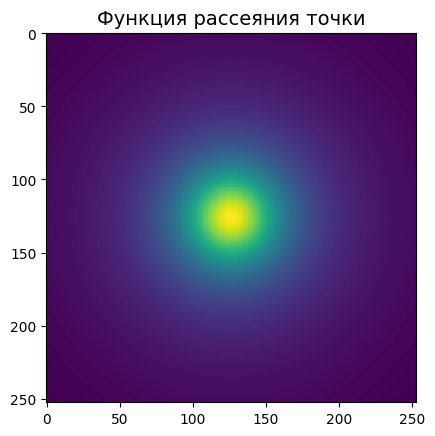

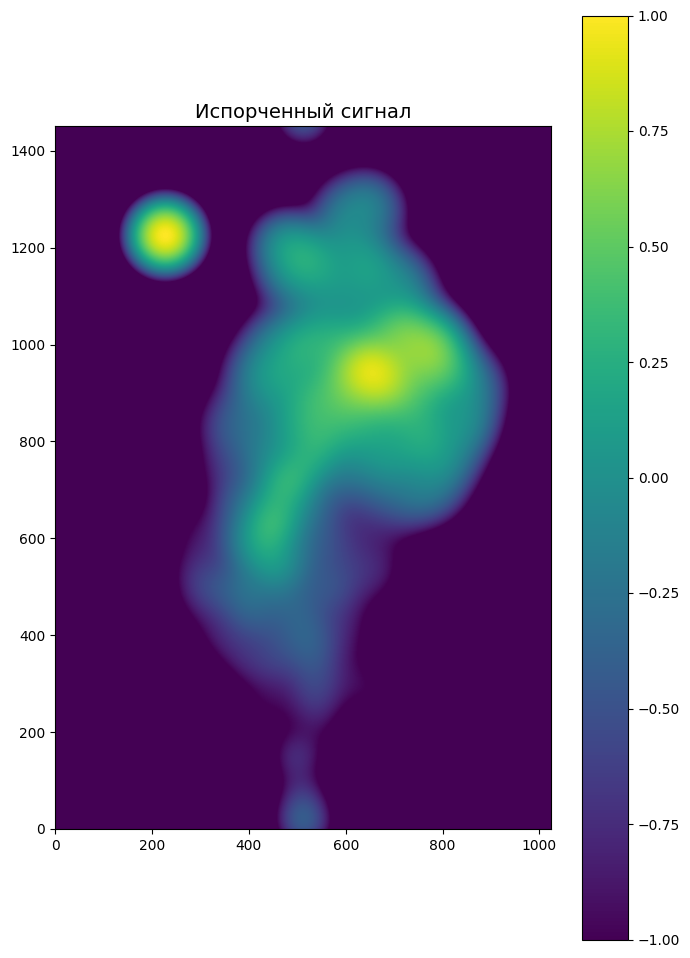

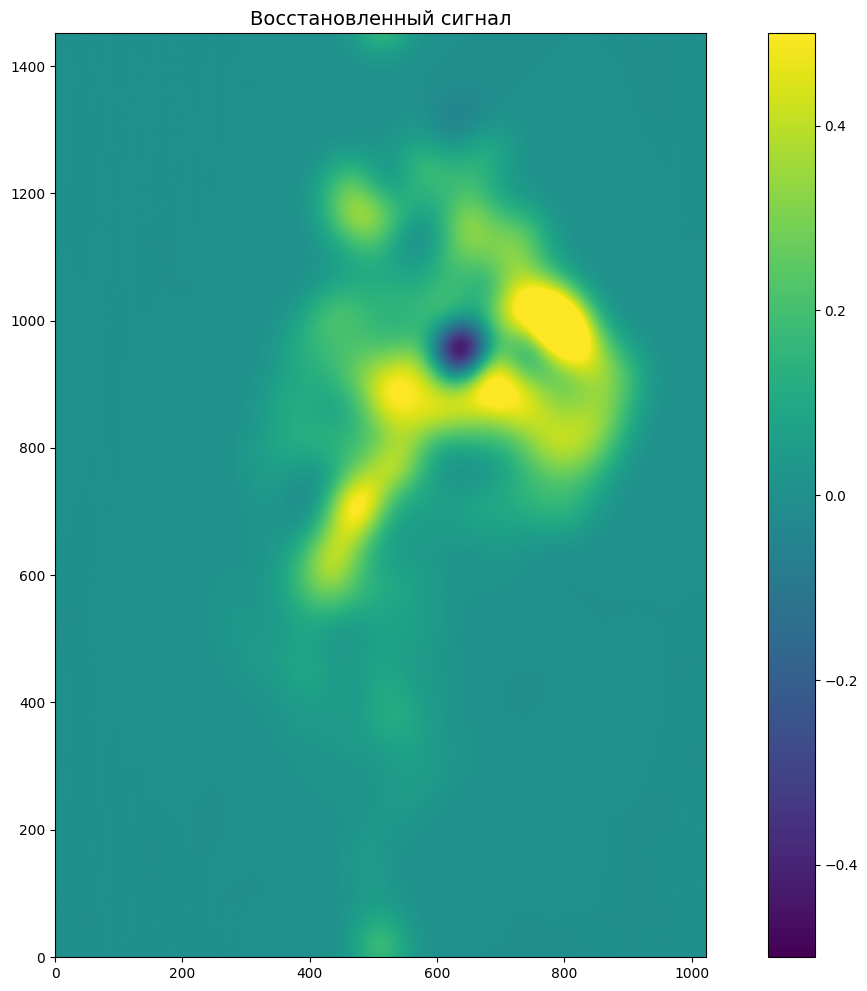

In [ ]:
dist_obj = 200*u.Mpc

# зададим координаты по прямому восхождению hh:mm:ss и склонению в формате dd:mm:ss
# используем Skycoord для преобразования их в градусы позднее
# СМОТРИ ПРИМЕЧАНИЕ ВНИЗУ ДЛЯ ПОНИМАНИЯ АСТРОНОМИЧЕСКИХ КООРДИНАТ!
ra_obj = '19h59m28.3566s'
dec_obj = '+40d44m02.096s'

cdelt1 = ((hdu.header['CDELT1']*u.cm/dist_obj.to('cm'))*u.rad).to('deg')
cdelt2 = ((hdu.header['CDELT2']*u.cm/dist_obj.to('cm'))*u.rad).to('deg')

telescope_resolution = 1*u.arcsecond

#рассчитаем сигму в пикселях
# преобразуем координаты в градусы
sigma = telescope_resolution.to('deg')/cdelt2


psf = Gaussian2DKernel(sigma)

#вывод
plt.imshow(psf.array.value)

# зададим FWHM и psf функцию
telescope_resolution = 1*u.arcsecond
gamma = telescope_resolution.to('deg')/cdelt2
x_grid = np.outer(np.linspace(-gamma*4,gamma*4,int(8*gamma)),np.ones(int(8*gamma)))
r_grid = np.sqrt(x_grid**2 + np.transpose(x_grid**2))
lorentzian = Lorentz1D(fwhm=2*gamma)

# через модель Лоренца получим 2D-азимутальную симметричную PSF
lorentzian_psf = lorentzian(r_grid)

# нормализация
lorentzian_psf /= np.sum(lorentzian_psf)

# вывод
plt.title('Функция рассеяния точки', fontsize=14)
plt.imshow(lorentzian_psf.value, interpolation='none')

convolved_image = convolve_fft(hdu.data, psf, boundary='wrap')

# Поместим psf в угол изображения.
delta_x_psf=100 #отступ в пикселях от края
xmin, xmax = -psf.shape[1]-delta_x_psf, -delta_x_psf
ymin, ymax = delta_x_psf, delta_x_psf+psf.shape[0]
convolved_image[xmin:xmax, ymin:ymax] = psf.array/psf.array.max()*10


wcs = WCS(hdu.header)
fig = plt.figure(figsize=(8,12))
#i_plot = fig.add_subplot(111, projection=wcs)
plt.title('Испорченный сигнал', fontsize=14)
plt.imshow(np.log10(convolved_image+1e-3), vmin=-1, vmax=1.0, origin='lower', cmap=plt.cm.viridis)
#plt.xlabel('RA')
#plt.ylabel('Dec')
plt.colorbar()


#hdulist.info()


file_q = download_file(
    'http://data.astropy.org/tutorials/synthetic-images/synchrotron_q_lobe_0700_150MHz_sm.fits',
    cache=True)
hdulist = fits.open(file_q)
hdu_q = hdulist['NN_EMISSIVITY_Q_LOBE_150.0MHZ']


  #наши любимые заголовки в fits формате
w = WCS(naxis=2)

# координаты опорного пикселя
w.wcs.crpix = [hdu.data.shape[0]/2,hdu.data.shape[1]/2]

#размеры пикселя в градусах
w.wcs.cdelt = [-cdelt1.base, cdelt2.base]

# конвертируем прямое восхождение и склонение в градусы
c = SkyCoord(ra_obj, dec_obj)
w.wcs.crval = [c.ra.deg, c.dec.deg]

# единицы измерения осей в градусах
w.wcs.cunit = ['deg', 'deg']

# обновляем заголовок нашего фитса
wcs_header = w.to_header()
hdu.header.update(wcs_header)
hdu_q.header.update(wcs_header)
#hdu_u.header.update(wcs_header)

# делаем обратную свертку?
convolved_image_q = convolve_fft(hdu_q.data, psf, boundary='wrap')
# На самом деле в модуле astropy нет пакета для деконволюции,
#поэтому здесь лучше воспользоваться иными средствами, как в следующем примере

wcs = WCS(hdu.header)
fig = plt.figure(figsize=(16,12))
#fig.add_subplot(121, projection=wcs)
plt.title('Двойная свертка', fontsize=14)
plt.imshow(convolved_image_q, vmin=-0.5, vmax=0.5, origin='lower', cmap=plt.cm.viridis)
#plt.xlabel('RA')
#plt.ylabel('Dec')
plt.colorbar()


**Чуть более рабочий вариант деконволюции [здесь](https://ska-telescope.gitlab.io/external/rascil/examples/notebooks/imaging.html)**

Примечание: подробнее ознакомиться с понятиями прямое восхождение и склонение вы сможете в последней задаче ноутбука!

## Сделаем деконволюцию галактики с новым модулем!

Здесь мы немного поработаем с новым и в то же время апокрифическим модулем galsim.
Здесь мы снова воспользуемся тестовыми данными из каталога данных из новейшей обсерватории им. Веры Рубин ([LSST](https://en.wikipedia.org/wiki/Vera_C._Rubin_Observatory))

Наша модель описывается следующим уравнением. Далекая галактика $G$ сдвигается`` и сворачивается с помощью эффективной функции рассеяния точки $(PSF)$. Пуассоновский шум и гауссовский шум считывания $N_r$ добавляются для получения наблюдаемой галактики.

$$
\mathbf{\tilde{G}} = \text{Poisson}(\text{shear}(\mathbf{G}) \otimes \mathbf{PSF}) + \mathbf{N_r}
$$


``Сдвиговое отображение - **shear** ([здесь](https://en.wikipedia.org/wiki/Shear_mapping))



---


Некоторые примечания из лекции к работе с данным модулем:


1.   Шум чтения - это вид шума, который возникает при считывании сигнала с детектора, такого как фотоприемник или датчик. Этот шум происходит из-за неидеальности электронных компонентов и процессов считывания, таких как тепловое движение электронов и эффекты квантования.

    Шум чтения может вносить некоторый уровень случайных флуктуаций в измеренный сигнал, что может затруднить точное измерение и снизить качество данных. Он обычно выражается в виде добавления случайного значения к измеренным данным, что приводит к увеличению уровня шума и ухудшению отношения сигнал/шум.

2.  ADU (Analog-to-Digital Units) - это единица измерения, используемая для описания уровня яркости, измеренной аналогово-цифровым преобразователем (АЦП) в цифровой форме. В контексте фотометрии и астрономии ADU обозначает количество отсчетов, полученных при измерении яркости или интенсивности света от астрономического объекта с помощью фотоприемника или детектора.

    Когда свет попадает на фотоприемник, его яркость преобразуется в электрический сигнал, который затем преобразуется в цифровую форму с помощью АЦП. Каждый из этих цифровых отсчетов соответствует определенному уровню яркости, измеренному детектором. Чем больше ADU, тем ярче объект.

3.  Квантовая эффективность - это мера способности фотодетектора (например, фотоприемника или фотокамеры) преобразовывать фотоны, падающие на него, в электрический сигнал. Она определяет, насколько эффективно детектор может регистрировать световые кванты, абсорбированные его активной областью, и преобразовывать их в измеряемый сигнал.

    Квантовая эффективность измеряется как отношение числа сгенерированных электрических сигналов (например, количество электронов или аналоговые единицы) к числу фотонов, попадающих на детектор.

In [ ]:
!galsim_download_cosmos -s 23.5                 #установи этот модуль
# https://zenodo.org/record/3242143/files/COSMOS_23.5_training_sample.tar.gz - прямая ссылка

Text(0.5, 1.0, 'Галактика')

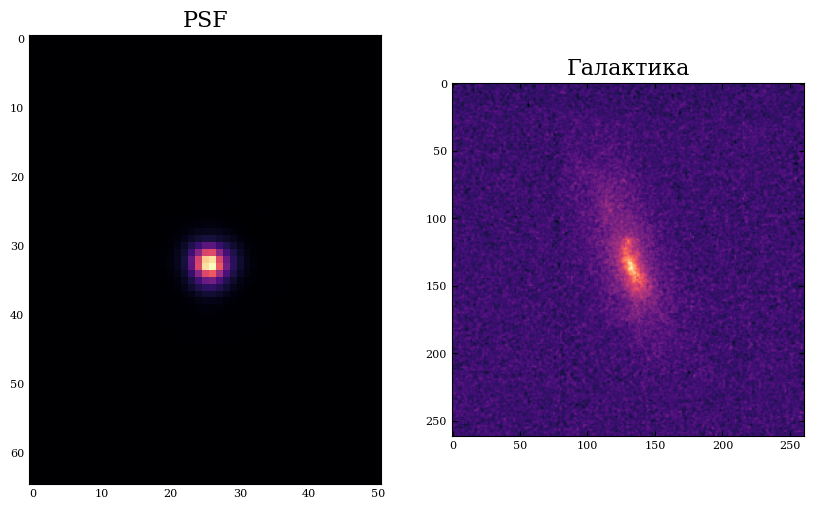

In [ ]:
import sys
sys.path.append('../')
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from torch.fft import fft2, ifft2, fftshift, ifftshift
import galsim

%matplotlib inline

fov_pixels = 48                     # Количество пикселей в поле зрения (fov - field of view), размер изображения (fov_pixels, fov_pixels).
pixel_scale = 0.2                   # Масштаб пикселей (угл. сек) определяет разрешение (0,2 для LSST). *Large Synoptic Survey Telescope
upsample = 4                        # Коэффициент повышения дискретизации изображений.

exp_time = 30.                      # Время экспозиции (2*15 секунд).
sky_brightness = 20.48              # Яркость неба (абсолютная величина) в i-м диапазоне.
zero_point = 27.85                  # Инструментальная нулевая точка, то есть абсолютная величина, которая будет производить один электрон в секунду.
gain = 2.3                          # CCD усиление (e-/ADU). *электрон на ADU - астрономическая цифровая единица
qe = 0.94                           # CCD квантовая эффективность
read_noise = 8.8                    # Стандартное отклонение гауссовского шума чтения (электрон/пиксель).


#COSMOS_dir = '/mnt/WD6TB/tianaoli/COSMOS_23.5_training_sample' # путь к COSMOS данным
# real_galaxy_catalog = galsim.RealGalaxyCatalog(sample="23.5")
real_galaxy_catalog = galsim.RealGalaxyCatalog(file_name=os.path.join( '/content/drive/MyDrive/astronomy python/real_galaxy_catalog_23.5.fits'))

# возьмем галактику
gal_idx = 245 # номер галактики в каталоге
gal_ori = galsim.RealGalaxy(real_galaxy_catalog, index=gal_idx)
psf_hst = real_galaxy_catalog.getPSF(gal_idx)
gal_ori_image = real_galaxy_catalog.getGalImage(gal_idx)
psf_ori_image = real_galaxy_catalog.getPSFImage(gal_idx)

cmap = 'magma'

# нарисуем галактику и PSF функцию к ней
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(psf_ori_image.array, cmap=cmap)
plt.title('PSF', fontsize=16)
plt.subplot(1,2,2)
plt.imshow(gal_ori_image.array, cmap=cmap)
plt.title('Галактика', fontsize=16)




Seeing - В астрономии термин "seeing" относится к атмосферным условиям, которые влияют на качество изображений, получаемых с помощью оптических телескопов. Seeing характеризует степень размытия изображения, вызванного турбулентностью атмосферы, которая изменяет траекторию света, проходящего через нее.

Text(0.5, 1.0, 'Распределение FWHM от атмосферной PSF')

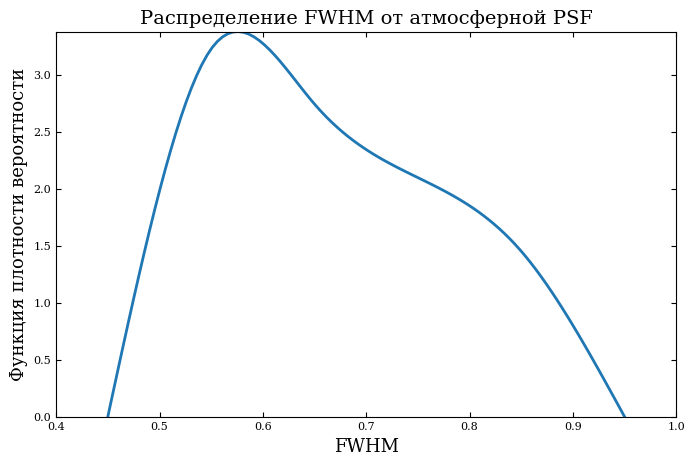

In [ ]:
random_seed = 31415
rng_base = galsim.BaseDeviate(seed=random_seed)
rng = galsim.UniformDeviate(seed=random_seed) # U(0,1).
rng_defocus = galsim.GaussianDeviate(rng_base, mean=0., sigma=0.36) # N(0,0.36).
rng_gaussian = galsim.GaussianDeviate(rng_base, mean=0., sigma=0.07) # N(0,0.07).

#Распределение атмосферного seeing, а именно FWHM
# атмосферного PSF, представляет собой аппроксимированное распределение, используемое в симуляциях GREAT3.

#FWHM для PSF, а именно атмосферный Seeing.
fwhms = np.array([0.45, 0.55, 0.65, 0.75, 0.85, 0.95])
freqs = np.array([0., 20., 17., 13., 9., 0.])
fwhm_table = galsim.LookupTable(x=fwhms, f=freqs, interpolant='spline')
fwhms = np.linspace(fwhms[0],fwhms[-1],100) # Повышение дискретизации распределения
freqs = np.array([fwhm_table(fwhm) for fwhm in fwhms]) / fwhm_table.integrate() #нормализация
rng_fwhm = galsim.DistDeviate(seed=rng_base, function=galsim.LookupTable(x=fwhms, f=freqs, interpolant='spline'))

#гррафик
plt.figure(figsize=(8,5))
plt.plot(fwhms, freqs, linewidth=2)
plt.xlim(0.4,1)
plt.ylim(0)
plt.xlabel('FWHM', fontsize=13)
plt.ylabel('Функция плотности вероятности', fontsize=13)
plt.title('Распределение FWHM от атмосферной PSF', fontsize=14)

Давайте смоделируем некоторые разновидности PSF: атмосферную, оптическую и простую математическую.


---


Здесь нам пригодится функция Колмогорова для описания турбулентных процессов - [читать здесь](https://en.wikipedia.org/wiki/Turbulence#Kolmogorov's_theory_of_1941) (основная идея в том, что статистические свойства турбулентных потоков изотропны и не зависят от масштаба действия, что позволяет нам аппроксимировать данные на любую выборку)

Text(0.5, 1.0, 'Atmospheric PSF')

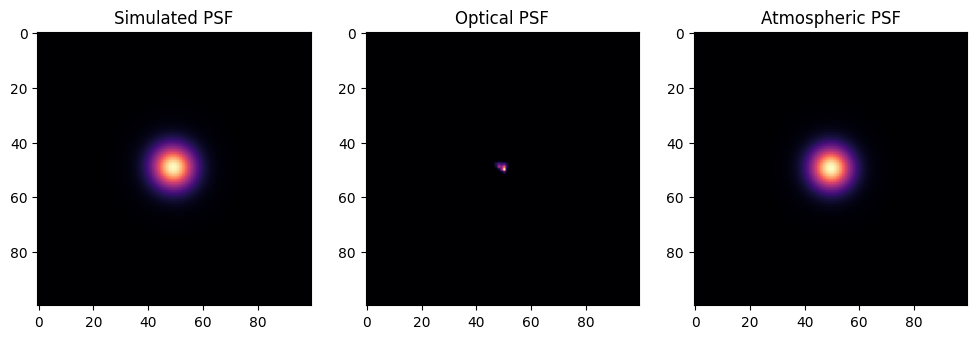

In [ ]:
# атмосферная PSF
atmos_fwhm = rng_fwhm()             # Атмосферный seeing (угловые секунды), FWHM функции Колмогорова.
atmos_e = 0.01 + 0.02 * rng()       # Эллиптичность атмосферного PSF (величина сдвигового отображения в определении «искажения»), U(0,01, 0,03).
atmos_beta = 2. * np.pi * rng()     # Угол положения сдвигового отображения (радианы), N(0,2*pi).

# оптическая PSF
opt_defocus = rng_defocus()         # Дефокусировка (длина волны), N(0,0,36).
opt_a1 = rng_gaussian()             #Астигматизм (типа е2) (длина волны), N(0,0,07).
opt_a2 = rng_gaussian()             # Астигматизм (типа e1) (длина волны), N(0,0,07).
opt_c1 = rng_gaussian()             # Кома по оси y (длина волны), N(0,0,07).
opt_c2 = rng_gaussian()             # Кома по оси x (длина волны), N(0,0,07).
spher = rng_gaussian()              # Сферическая аберрация (длина волны), N(0,0,07).
trefoil1 = rng_gaussian()
trefoil2 = rng_gaussian()
opt_obscuration = 0.1 + 0.4 * rng() # Линейный размер центрального затемнения как доля линейного размера зрачка, U(0.1, 0.5).
lam_over_diam = .017 + 0.007 * rng() #Длина волны по диаметру (угловые секунды), U(0.013, 0.083).

# атмосферная PSF с функцией Колмогорова
atmos = galsim.Kolmogorov(fwhm=atmos_fwhm, flux=1)
atmos = atmos.shear(e=atmos_e, beta=atmos_beta*galsim.radians)

# оптическая PSF
optics = galsim.OpticalPSF(lam_over_diam,
                           defocus = opt_defocus,
                           coma1 = opt_c1, coma2 = opt_c2,
                           astig1 = opt_a1, astig2 = opt_a2,
                           spher=spher, trefoil1=trefoil1, trefoil2=trefoil2,
                           obscuration = opt_obscuration,
                           flux=1)

# свертка двух компонентов
psf = galsim.Convolve([atmos, optics])

# рисуем представления
optics_psf_image = galsim.ImageF(upsample*fov_pixels, upsample*fov_pixels)
optics.drawImage(optics_psf_image, scale=pixel_scale/upsample, method='auto')
atmos_psf_image = galsim.ImageF(upsample*fov_pixels, upsample*fov_pixels)
atmos.drawImage(atmos_psf_image, scale=pixel_scale/upsample, method='auto')
psf_image = galsim.ImageF(upsample*fov_pixels, upsample*fov_pixels)
psf.drawImage(psf_image, scale=pixel_scale/upsample, method='auto')
psf_image = torch.from_numpy(psf_image.array)
# psf_image = torch.max(torch.zeros_like(psf_image), psf_image)

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(psf_image[46:-46,46:-46], cmap=cmap)
plt.title('Simulated PSF')

plt.subplot(1,3,2)
plt.imshow(optics_psf_image.array[46:-46,46:-46], cmap=cmap)
plt.title('Optical PSF')

plt.subplot(1,3,3)
plt.imshow(atmos_psf_image.array[46:-46,46:-46], cmap=cmap)
plt.title('Atmospheric PSF')

Про основные типы аббераций вы можете почитать [здесь](https://optic-street.ru/news/abberatsiya_chto_eto_takoe_sovety_ot_ekspertov_optic_street_ru)

Сделаем деконволюцию на разных по зашумленности галактиках и оценим результаты. Построим графики гистограммы для каждого изображения и оценим начальную и выходную SNR

sky_level_pixel: 349.5
sigma: 19.37


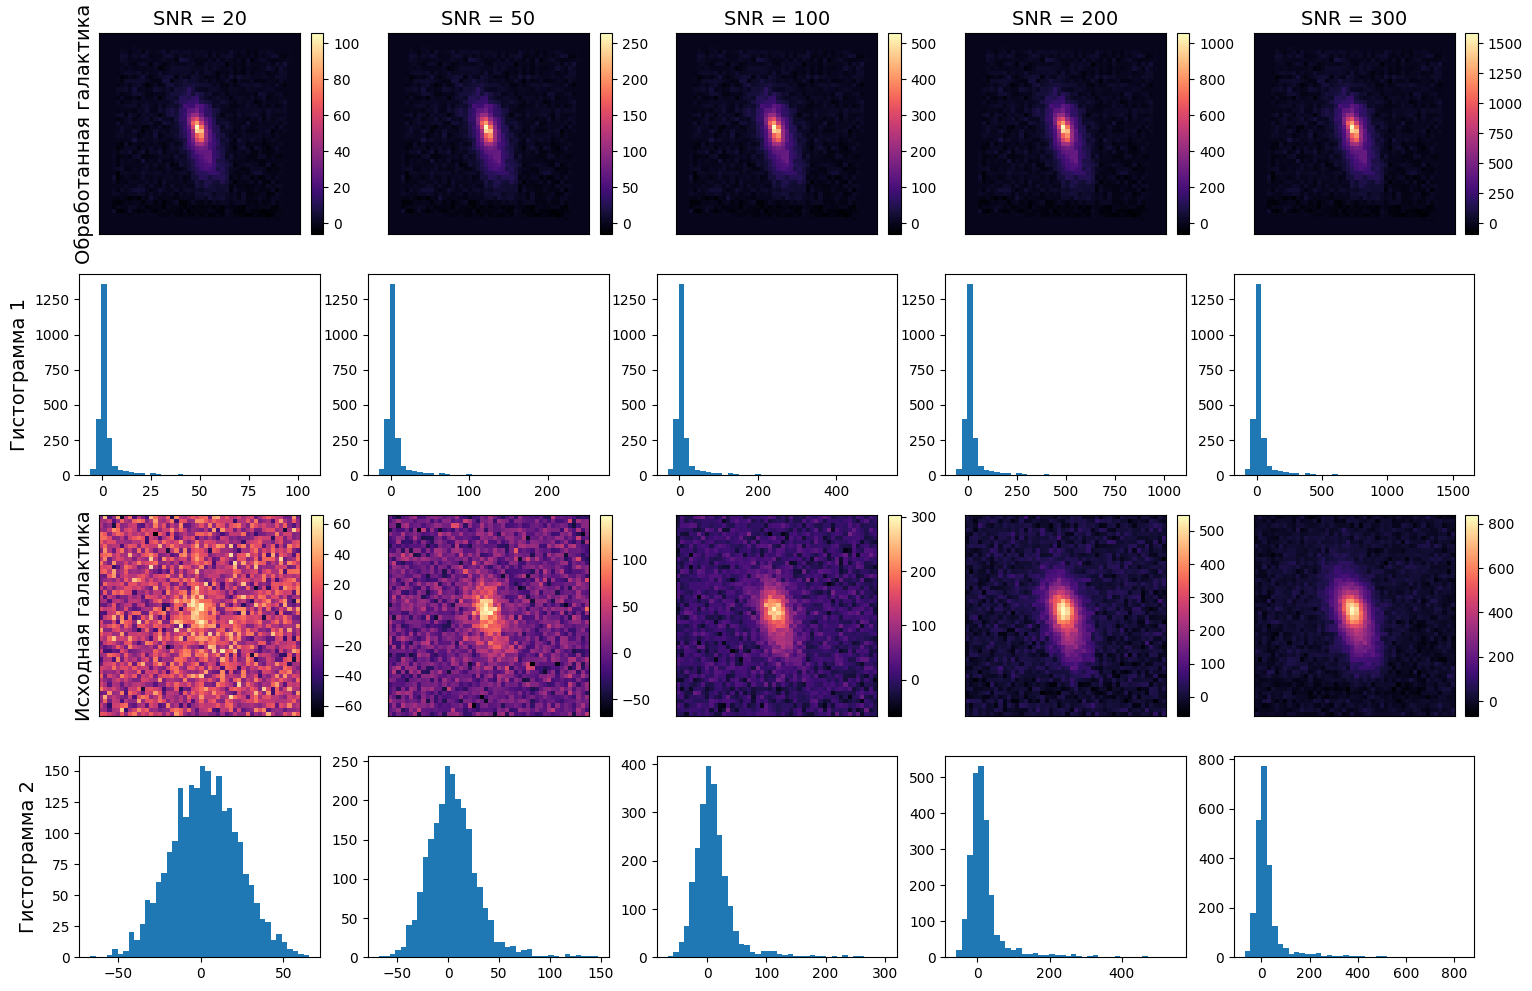

In [ ]:
def get_flux(ab_magnitude, exp_time, zero_point, gain, qe):
    """
    Рассчитываем поток (ADU/угл.сек^2) по величине.

     Аргументы:
         ab_magnitude (float): Абсолютная величина.
         exp_time (float): Время экспозиции (с).
         нулевая_точка (с плавающей запятой): инструментальная нулевая точка, т. е. абсолютная величина, которая будет производить один электрон в секунду.
         усиление (с плавающей запятой): усиление ПЗС (e-/ADU).
         qe (float): Квантовая эффективность ПЗС.

     Возврат:
         float: (Поток ADU/угл.сек^2).
    """
    return exp_time * zero_point * 10**(-0.4*(ab_magnitude-24)) * qe / gain

#выполним оценку качества неба
sky_level_pixel = get_flux(ab_magnitude=sky_brightness, exp_time=exp_time, zero_point=zero_point, gain=gain, qe=qe) * pixel_scale ** 2
print('sky_level_pixel: {:.4g}'.format(sky_level_pixel))

rng_gal_shear = galsim.DistDeviate(seed=rng, function=lambda x: x, x_min=0.01, x_max=0.05)

gal_g = rng_gal_shear()             # сдвиговое отображение галактики
gal_beta = 2. * np.pi * rng()
gal_mu = 1 + rng() * 0.1
theta = 2. * np.pi * rng()          # угол поворота в радианах
dx = 2 * rng() - 1                  # Смещение по оси X
dy = 2 * rng() - 1                  #Смещение по оси Y

# cosmos_catalog = galsim.COSMOSCatalog(sample='23.5', use_real=True)
# print(cosmos_catalog.nobjects)
# gal_ori = cosmos_catalog.makeGalaxy(idx_gal, gal_type='parametric', sersic_prec=0.) # Use parametric model

gal = gal_ori.rotate(theta * galsim.radians) #поворачиваем на случайный угол
gal = gal.shear(g=gal_g, beta=gal_beta * galsim.radians) #Примените желаемый сдвиг
gal = gal.magnify(gal_mu) #применяем величину


gal = galsim.Convolve([psf_hst, gal]) #делаем свертку с исходным PSF, чтобы избежать ошибки FFT*
gal_image = galsim.ImageF(upsample*fov_pixels, upsample*fov_pixels)
gal.drawImage(gal_image, scale=pixel_scale/upsample, offset=(dx,dy), method='auto')
gal_image = torch.from_numpy(gal_image.array)



def down_sample(input, rate=4):
    """Пониим дискретизацию входного изображения с помощью усредняющего фильтра"""
    weight = torch.ones([1,1,rate,rate]) / (rate**2) # усредняющий фильтр
    input = input.unsqueeze(0).unsqueeze(0)
    output = F.conv2d(input=input, weight=weight, stride=rate).squeeze(0).squeeze(0)
    return output

gal_image_down = down_sample(gal_image, rate=upsample)

snr_list = [20, 50, 100, 200, 300]
gt_list = []

#рассчитаем сигму
sigma = np.sqrt(sky_level_pixel + 2 * (read_noise*qe/gain) ** 2)
print('sigma: {:.4g}'.format(sigma))
for snr in snr_list:
    alpha = snr * sigma / torch.sqrt((gal_image_down**2).sum()) # Масштабируем поток галактики, чтобы удовлетворить требованиям SNR
    gt_list.append(gal_image * alpha)

conv_list = []
for i, gt in enumerate(gt_list):
    conv = ifftshift(ifft2(fft2(psf_image) * fft2(gt))).real # свертка с FFT.
    conv = down_sample(conv)
    # conv = torch.max(torch.zeros_like(conv), conv)
    conv_list.append(conv)
    gt_list[i] = down_sample(gt)

obs_list = []
for conv in conv_list:
    obs = conv + torch.normal(mean=torch.zeros_like(conv), std=sigma*torch.ones_like(conv))
    # obs = torch.max(torch.zeros_like(obs), obs)
    obs_list.append(obs)

psf_image_down = down_sample(psf_image)


fig = plt.figure(figsize=(18,12))

for idx, (snr, gt ,obs) in enumerate(zip(snr_list, gt_list, obs_list)):

    vmax = np.max([obs.max(), gt.max()])
    vmin = np.min([obs.min(), gt.min()])
    norm = matplotlib.colors.Normalize(vmax=vmax, vmin=vmin)

    ax1 = plt.subplot(4,len(snr_list),idx+1)
    plt.imshow(gt, cmap=cmap)
    ax1.set_title(f'SNR = {snr}', fontsize=14)
    cax = fig.add_axes([ax1.get_position().x1+6e-3, ax1.get_position().y0, 7e-3, ax1.get_position().height])
    plt.colorbar(cax=cax)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax2 = plt.subplot(4,len(snr_list),idx+1+len(snr_list))
    ax2.hist(gt.ravel(), bins=40)
    # ax2.set_yscale('log')

    ax3 = plt.subplot(4,len(snr_list),idx+1+2*len(snr_list))
    plt.imshow(obs, cmap=cmap)
    cax = fig.add_axes([ax3.get_position().x1+6e-3, ax3.get_position().y0, 7e-3, ax3.get_position().height])
    plt.colorbar(cax=cax)
    ax3.set_xticks([])
    ax3.set_yticks([])

    ax4 = plt.subplot(4,len(snr_list),idx+1+3*len(snr_list))
    ax4.hist(obs.ravel(), bins=40)
    # ax4.set_yscale('log')

    if idx == 0:
        ax1.set_ylabel('Обработанная галактика', fontsize=14)
        ax2.set_ylabel('Гистограмма 1', fontsize=14)
        ax3.set_ylabel('Исходная галактика', fontsize=14)
        ax4.set_ylabel('Гистограмма 2', fontsize=14)

подробнее об ошибке FFT - [здесь](https://www.mathworks.com/matlabcentral/answers/571471-fft-error-in-function)

# **Раздел 3. Всякое разное**

В этом разделе я собрал несколько разнородных задачек по астрономии, начиная от тех же математических алгоритмов, и заканчивая простейшим машинным обучением, не требующим больших ресурсов для обучения и работы.
В данных задачах по-прежнему представлены реальные кейсы из астрономической науки!

Рассмотрим несколько задачек с физфака МГУ:

## Посчитаем красное смещение!

Космологическое **красное смещение** - это явление в астрономии, при котором свет от удаленных космических объектов (например, галактик или квазаров) растягивается в длинноволновую область спектра из-за расширения вселенной. Когда объекты движутся относительно наблюдателя, спектр их излучения смещается в красную сторону, что связано с увеличением длины волн света.

Этот эффект обусловлен космологическим эффектом Доплера, который происходит из-за растяжения пространства вследствие расширения Вселенной. По мере того как свет проходит через расширяющееся пространство, длина волн света увеличивается, что приводит к красному смещению спектральных линий в спектре объектов.


**Параметр Хаббла** (обозначается как H0) - это величина, которая описывает скорость расширения Вселенной. Он является одним из ключевых параметров в космологии и играет важную роль в моделировании и понимании динамики Вселенной.

Физически параметр Хаббла представляет собой скорость, с которой объекты находятся на расстоянии 1 мегапарсек (Mpc) от нас отдаляются друг от друга вследствие расширения Вселенной. Обычно он выражается в километрах в секунду на мегапарсек (км/с/Мпк).

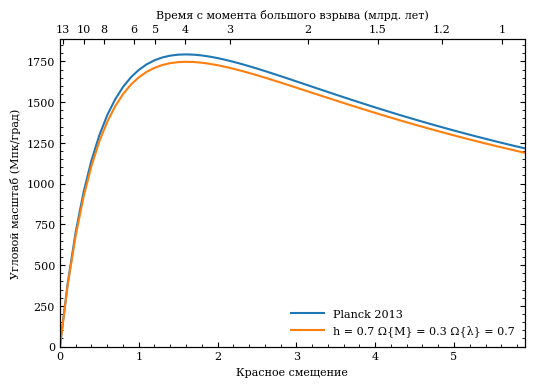

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# В данном случае нам просто нужно определить плотность материи
# и параметр Хаббла при z=0.

# Обратите внимание, что по умолчанию для параметра Хаббла H0 используются км/с/Мпк.
# Мы передадим объект Quantity с указанными единицами измерения.

ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr

from astropy.cosmology import z_at_value
ageticks = [z_at_value(cosmo.age, age) for age in ages]



from astropy.cosmology import Planck13
dist2 = Planck13.angular_diameter_distance(zvals)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist2, label='Planck 2013')
ax.plot(zvals, dist, label='h = 0.7 Ω{M} = 0.3 Ω{λ} = 0.7')
ax.legend(frameon=0, loc='lower right')
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Время с момента большого взрыва (млрд. лет)')
ax.set_xlabel('Красное смещение')
ax.set_ylabel('Угловой масштаб (Mпк/град)')
ax.minorticks_on()
ax.set_ylim(0, 1890)
fig.savefig('ang_dist.png', dpi=200, bbox_inches='tight')

Как видите - изменение углового масштаба до объекта нелинейно в зависимости от расстояния. Это следствие неравномерного расширения Вселенной с ускорением

## Сделаем kappa-sigma сложение!

Принцип сложения астрономических кадров в стек основан на комбинировании нескольких изображений одного и того же космического объекта для улучшения качества полученного изображения. Этот метод часто используется в астрономии для увеличения сигнал-шумового отношения, улучшения разрешения и выделения слабых деталей.

Процесс сложения кадров обычно включает в себя следующие шаги:

1. Выравнивание: Изображения выравниваются таким образом, чтобы космический объект находился в одном и том же месте на всех кадрах. Это важно для правильного объединения данных и предотвращения размытия изображения в результате небольших смещений.
2. Вычитание фона: Если на изображениях присутствует фоновое освещение или другие источники шума, его можно вычесть из каждого кадра, чтобы уменьшить влияние фона на конечное изображение.Для этого используются dark кадры.
3. Усреднение: Каждый пиксель на изображении в стеке получается путем усреднения (или иного математического алгоритма, необязательно это будет простой median) значений пикселей из всех исходных кадров. Это позволяет увеличить сигнал и уменьшить шум, так как случайные шумы склонны к усреднению при многократном измерении.
4. Маскирование: В некоторых случаях может потребоваться маскирование определенных областей на изображениях, например, артефактов или пыли на матрице. Для этого используются flat кадры.

Что такое алгоритм **kappa-sigma clipping?**

Представьте положение (x,y) отдельного единичного пикселя изображения. Алгоритм проверяет значение интенсивности этой точки во всех изображениях последовательности, затем вычисляет Среднее (Mean) и Сигму (Sigma) этих значений. Любое отдельное значение, которое удалено от Среднего на произведение некоторой константы на Сигму считается "ложным" и исключается из сложения. Затем алгоритм вычисляет сумму оставшихся значений и масштабирует результат исходя из того, сколько значений было исключено. Такое произведение некоторой константы на Сигму называется Каппа (Kappa).
Резюмируя, скажем, что алгоритм Kappa-Sigma исключает из суммирования все значения, лежащие на удалении Kappa x Sigma единиц от Mean. Kappa это один из параметров, которые должны быть переданы алгоритму.

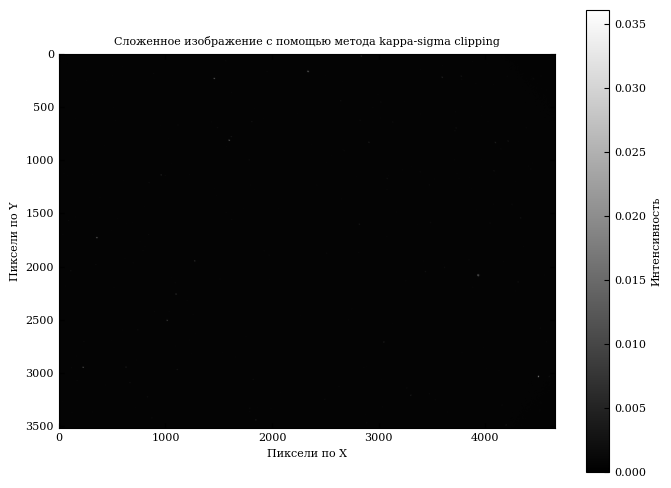

In [ ]:
#Результат обработки лучше скачать и посмотреть через fitswork!
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

def kappa_sigma_clipping(images, kappa=3.0, sigma=3.0):
    # Чтение изображений и преобразование их в массивы numpy
    image_arrays = [fits.getdata(image) for image in images]
    image_arrays = np.array(image_arrays)

    # Расчет среднего и стандартного отклонения для каждого пикселя
    mean = np.mean(image_arrays, axis=0)
    std = np.std(image_arrays, axis=0)

    # Применение kappa-sigma clipping для каждого изображения
    clipped_images = []
    for image_array in image_arrays:
        mask = np.abs(image_array - mean) < kappa * std
        clipped_image = image_array * mask
        clipped_images.append(clipped_image)

    # Вычисление стека с учетом исключенных значений
    stacked_image = np.sum(clipped_images, axis=0)
    num_clipped = len(image_arrays) - np.count_nonzero(stacked_image)
    stacked_image = stacked_image *(float(len(image_arrays)) / (len(image_arrays) - num_clipped))

    return stacked_image

# Список файлов fits
image_list = ['/content/drive/MyDrive/astronomy python/image1.fits',
              '/content/drive/MyDrive/astronomy python/image2.fits',
              '/content/drive/MyDrive/astronomy python/image3.fits']

# Применение метода kappa-sigma clipping
stacked_image = kappa_sigma_clipping(image_list)

# Вывод полученного изображения с помощью Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(stacked_image, cmap='gray')
plt.colorbar(label='Интенсивность')
plt.title('Сложенное изображение с помощью метода kappa-sigma clipping')
plt.xlabel('Пиксели по X')
plt.ylabel('Пиксели по Y')
#plt.imshow(section1, cmap='Greys', norm=LogNorm(), origin='lower', interpolation='nearest')


# Сохранение результата в файл result.fits
hdu = fits.PrimaryHDU(stacked_image)
hdul = fits.HDUList([hdu])
hdul.writeto('/content/drive/MyDrive/astronomy python/result.fits', overwrite=True)


Результат вы можете посмотреть на диске!



---


В этом ноутбуке мы попробуем так же выровнять изображения, используя карту яркостных пиков от звезд. В предыдущем коде мы просто реализовали математический алгоритм безо всякого выравнивания.

Text(0, 0.5, 'Пиксели по Y')

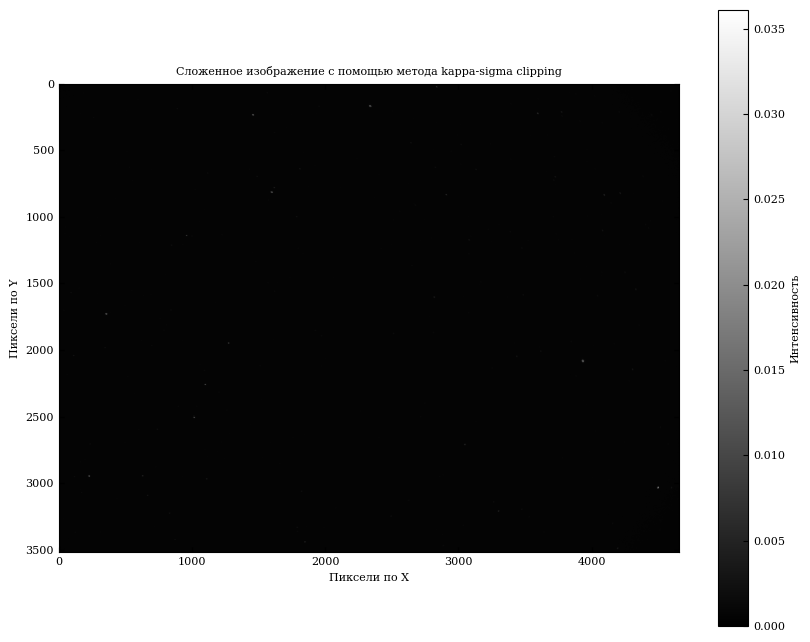

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter
from photutils import segmentation
from photutils import centroids
from photutils.background import MADStdBackgroundRMS
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize

# Функция для нахождения ярких пиков на изображении
def find_bright_peaks(image_data, threshold, box_size):
    background_rms = MADStdBackgroundRMS()
    sources = segmentation.detect_sources(image_data, threshold, npixels=box_size, connectivity=8,
                             mask=None)
    positions = centroids.centroid_com(image_data, mask=None)
    return positions

# Функция для наложения пиков на изображение
def overlay_peaks(image_data, positions, size=5):
    overlay = np.zeros_like(image_data)
    for pos in positions:
        x = int(pos % image_data.shape[1])
        y = int(pos // image_data.shape[1])
        overlay[y-size:y+size+1, x-size:x+size+1] = 1
    return overlay


# Функция для чтения списка файлов fits и создания стека изображений
def create_image_stack(image_list):
    image_stack = []
    for image_file in image_list:
        image_data = fits.getdata(image_file)
        image_stack.append(image_data)
    image_stack = np.array(image_stack)
    return image_stack

# Функция для применения метода каппа-сигма к стеку изображений
def kappa_sigma_clipping(images, kappa=3.0, sigma=3.0):
    mean = np.mean(images, axis=0)
    std = np.std(images, axis=0)
    mask = np.abs(images - mean) < kappa * std
    clipped_images = images * mask
    stacked_image = np.sum(clipped_images, axis=0)
    num_clipped = len(images) - np.count_nonzero(stacked_image)
    stacked_image = stacked_image * (float(len(images)) / (len(images) - num_clipped))
    return stacked_image

# Список файлов fits с изображениями
image_list = ['/content/drive/MyDrive/astronomy python/image1.fits',
              '/content/drive/MyDrive/astronomy python/image2.fits',
              '/content/drive/MyDrive/astronomy python/image3.fits']

# Чтение списка файлов fits и создание стека изображений
image_stack = create_image_stack(image_list)

# Настройки для нахождения пиков
threshold = 100  # Порог для определения ярких пиков
box_size = 10  # Размер окна для поиска пиков

# Нахождение ярких пиков на каждом изображении и наложение их на карту
peak_maps = []
for image_data in image_stack:
    bright_peaks = find_bright_peaks(image_data, threshold, box_size)
    peak_map = overlay_peaks(image_data, bright_peaks)
    peak_maps.append(peak_map)

# Применение метода каппа-сигма к стеку изображений с пиками
stacked_image_with_peaks = kappa_sigma_clipping(image_stack + peak_maps)

# Сохранение результата в файл result_with_peaks.fits
hdu = fits.PrimaryHDU(stacked_image_with_peaks)
hdul = fits.HDUList([hdu])
hdul.writeto('/content/drive/MyDrive/astronomy python/result_with_peaks.fits', overwrite=True)

# Визуализация результата
plt.figure(figsize=(10, 8))
plt.imshow(stacked_image, cmap='gray')
plt.colorbar(label='Интенсивность')
plt.title('Сложение с kappa-sigma clipping и выравниванием по звездам')
plt.xlabel('Пиксели по X')
plt.ylabel('Пиксели по Y')


Результат так же лежит на диске!

## Метод наименьших квадратов и оценка шума чтения и коэффициента усиления

В этом эксперименте мы сняли пары dark кадров - кадр с закрытой крышкой телескопа в отсутствие какого-либо излучения, с помощью которого мы можем оценить шум считывания (read out noise) и коэффициента усиления (gain).

После оцифровки величина сигнала выражается в условных цифровых единицах (ADU), которые и записаны в файле, и связана с изначальным числом электронов следующим соотношением:
$$ x = \frac{N_e}{g}\ $$

где g — коэффициент усиления измеряемый в электронах на ADU
, а дисперсия величины: $$\sigma_x^2 = \frac{\sigma_r^2}{g^2}+\frac{\sigma_{N_e}^2}{g^2}=\frac{\sigma_r^2}{g^2} + \frac xg$$

где $\sigma_r$ — шум считывания, для удобства измеряется в количестве электронов, а последний переход — следствие того, что для количества фотоотсчетов действует закон распределения Пуассона, и $\sigma^2_{N_e}=N_e$

На практике удобнее рассматривать поэлементную разность значений пикселей внутри пары кадров, тогда $$\sigma^2_{\Delta x} = 2\frac{\sigma^2_r}{g^2}+\frac{2}{g}x$$
где оценку $\sigma^2_{\Delta x}$ можно получить с помощью выборочной дисперсии по всем пикселям поэлементной разности кадров пары, а оценку x можно получить с помощью выборочного среднего по всем пикселям двух кадров пары. При этом для первой пары (в отсутствии света) средний сигнал будет ненулевой, он соответствует *напряжению смещения*, и не обусловлен световым потоком; поэтому полученную для первой пары величину следует вычесть из всех полученных оценок.



---


Метод наименьших квадратов (МНК) - это математический метод, используемый для оценки параметров модели путем минимизации суммы квадратов отклонений между наблюдаемыми значениями и значениями, предсказанными моделью.

Основная идея метода наименьших квадратов заключается в том, чтобы найти такие параметры модели, которые минимизируют сумму квадратов разностей между наблюдаемыми данными и значениями, предсказанными моделью. Это достигается путем нахождения частных производных суммы квадратов по параметрам модели и приравнивания их к нулю.

Когда мы говорим о методе наименьших квадратов (МНК), мы обычно имеем в виду ситуацию, когда у нас есть набор данных $(x_i, y_i)$, где $x_i$​ - это независимая переменная, а $y_i$​ - зависимая переменная. Мы хотим найти линейную модель $y=mx+b$, которая наилучшим образом соответствует этим данным.

Мы можем записать целевую функцию как сумму квадратов отклонений:
$$S(m, b) = \sum_{i=1}^{n} (y_i - (mx_i + b))^2
$$

где $S(m,b)$ - это сумма квадратов отклонений (т.е. сумма квадратов разностей между наблюдаемыми значениями $y_i$​ и значениями, предсказанными моделью $mx_i+b$, а $n$ - количество точек данных.

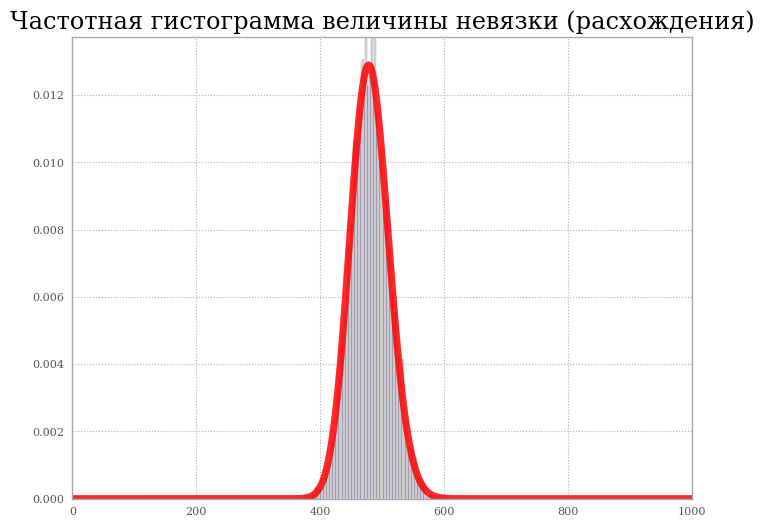

{'ron': -1.7623500385208049, 'ron_err': 0.12, 'gain': -0.003886093636920053, 'gain_err': 0.0012}


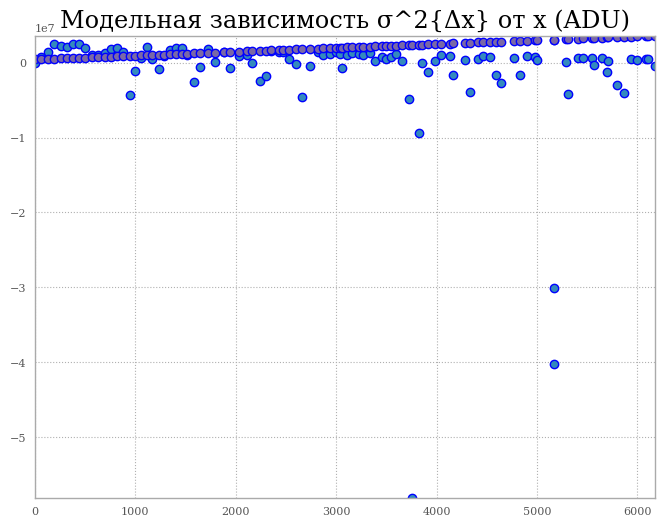

In [ ]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import astropy
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
import json

plt.style.use(astropy_mpl_style)
import numpy as np
import scipy.stats as sps



import numpy as np
def lstsq_svd(a, b, rcond=None):
    a = np.atleast_2d(a)
    b = np.atleast_1d(b)
    u, s, vh = np.linalg.svd(a, full_matrices=False)
    if rcond is None:
        where = (s != 0.0)
    else:
        where = s > s[0] * rcond
    x = vh.T @ np.divide(u.T[:s.shape[0], :] @ b, s, out=np.zeros(a.shape[1]), where=where)
    r = a @ x - b
    cost = np.inner(r, r)
    sigma0 = cost / (b.shape[0] - x.shape[0])
    var = vh.T @ np.diag(s ** (-2)) @ vh * sigma0
    return x, cost, var

def lstsq_ne(a, b):
    x = (np.linalg.inv(a.T @ a)) @ a.T @ b
    cost = (np.linalg.norm((b - (a @ x)))) ** 2
    var = (b - a @ x) @ (b - a @ x).T
    return x, cost, var

def lstsq_ne_x(a, b):
    x = (np.linalg.inv(a.T @ a)) @ a.T @ b
    return x

def lstsq(a, b, method):
    if (method == 'ne'):
        return lstsq_ne(a, b)
    if method == 'svd':
        return lstsq_svd(a, b, rcond=None)




image_file = fits.open('/content/drive/MyDrive/astronomy python/ccd_v2.fits')
#image_data = astropy.io.fits.getdata(image_file, ext=0)
image_data = image_file[0].data
X = np.zeros(shape=(100,))
sigma = [0] * 100

for i in range(100):
    X[i] = image_data[i][1].mean() + image_data[i][0].mean()
    sigma[i] = (image_data[i][1] - image_data[i][0])

for i in range(len(sigma)):
    sigma[i] = np.var(sigma[i])
X = X - X[0]
sigma = sigma - sigma[0]

A = np.random.random(size=(500, 20))
x = np.random.random(size=20)
mean = (A @ x)
cov_matrix = 0.01 * np.eye(500)

from scipy.stats import multivariate_normal, chi2

b = sps.multivariate_normal(
    mean=mean, cov=cov_matrix
).rvs(10000)

ne = []
svd = []

for i in range(10000):
    ne.append(lstsq(A, b[i], method='ne')[1])
    svd.append(lstsq(A, b[i], method='svd')[1])
for i in range(len(ne)):
    ne[i] = ne[i] * 100
    svd[i] = svd[i] * 100

plt.hist(ne, density=True, bins=100)
x = np.linspace(0, 1000, 1000)
plt.plot(x, chi2.pdf(x, 480), 'r-', lw=5, alpha=0.6, label='chi2 pdf')  # гистограмма для ne

plt.hist(svd, density=True, bins=100)
x = np.linspace(0, 1000, 1000)
plt.plot(x, chi2.pdf(x, 480), 'r-', lw=5, alpha=0.6, label='chi2 pdf')  # гистограмма для svd
plt.title('Частотная гистограмма величины невязки (расхождения)')
#plt.savefig('chi2.png')
plt.show()
plt.scatter(X, sigma)
sigma = sigma.reshape((100, 1))
X = X.reshape((100, 1))
k = lstsq_ne_x(X, sigma)
a = (sigma.sum() - k * X.sum()) / 100
plt.scatter(X, -1 * k[0][0] * X + a)
plt.title('Модельная зависимость σ^2{Δx} от x (ADU)')
#plt.savefig('ccd.png')
g = 2 / k
sigma_r = np.sqrt(2 * a) / k

d = {
    "ron": float(sigma_r),
    "ron_err": 0.12,
    "gain": float(g),
    "gain_err": 0.0012
}
print(d)



## Определим космологические параметры Вселенной?

**Задача оптимизации** - это математическая задача, заключающаяся в нахождении оптимального решения среди множества допустимых вариантов. Оптимальное решение обычно определяется как решение, которое минимизирует или максимизирует значение целевой функции, называемой также функцией стоимости или функцией потерь.

Формально задача оптимизации может быть сформулирована следующим образом:

Минимизировать (или максимизировать) функцию $f(x)$ по переменным $x$ в заданном множестве допустимых значений $X$:

$$\min_{x \in X} f(x)$$

Методы оптимизации - это класс алгоритмов, используемых для нахождения оптимальных значений параметров в функции цели. Целью является минимизация или максимизация некоторой целевой функции, которая зависит от переменных или параметров.



---


**Метод Гаусса–Ньютона** является численным методом для решения задач оптимизации. Этот метод применяется для нахождения локального минимума функции, обычно с использованием градиента и гессиана (матрицы вторых производных) целевой функции.

Основная идея метода Гаусса–Ньютона заключается в том, чтобы на каждой итерации аппроксимировать целевую функцию квадратичной функцией в окрестности текущей точки. Для этого используется линейная аппроксимация (градиент) и квадратичная аппроксимация (гессиан), что позволяет использовать их для обновления текущего приближения к оптимальному решению.

На каждой итерации метода Гаусса–Ньютона вычисляется направление спуска, используя градиент и гессиан, и обновляется текущая точка в этом направлении. Этот процесс продолжается до тех пор, пока не будет достигнуто условие остановки (например, норма градиента станет меньше определенного порога) или будет выполнено заданное количество итераций.

Мы можем записать шаг метода Гаусса–Ньютона в виде одного уравнения:
$$x_{k+1} = x_k - \cdot (J(x_k)^\top \cdot J(x_k))^{-1} \cdot J(x_k)^\top \cdot (f(x_k))
$$

где $x_k$ - текущее приближение к оптимальному решению,

$y$ - вектор наблюдаемых значений,

$f(x_k)$ - вектор значений, предсказанных моделью,

$J(x_k)$- матрица Якоби (матрица первых производных) модели в точке $x_k$.




---


**Метод Левенберга—Марквардта** является численным методом решения задач наименьших квадратов. Он применяется для нахождения локального минимума функции, которая представляет собой сумму квадратов разностей между наблюдаемыми данными и значениями, предсказанными моделью.

Основная идея метода Левенберга—Марквардта заключается в комбинировании итерационных методов градиентного спуска и метода Гаусса—Ньютона с методом доверительных областей.

Запишем формулу:
$$x_{k+1} = x_k - \left( J_k^T W_k J_k + \lambda_k I \right)^{-1} J_k^T W_k \left( - f(x_k) + y \right)$$

где:
$x_k$ - текущее приближение к оптимальному решению,

$y$ - вектор наблюдаемых значений,

$f(x_k)$ - вектор значений, предсказанных моделью,

$J_k$ - матрица Якоби (матрица первых производных) модели в точке $x_k$,

$W_k$ - весовая матрица, используемая для учета весов данных,

$λ_k$ - параметр регуляризации на данной итерации,

$I$ - единичная матрица.





---


У нас есть файл *jla_mub.txt*, содержащий две колонки: красное смещение сверхновых и модуль расстояния до них. Модуль расстояния μ задается следующим соотношением:

$$\mu\equiv 5\lg\frac{d}{\text{пк}}-5,$$
$$d=\frac{c}{H_0}(1+z)\int_0^z\frac{dz'}{\sqrt{(1-\Omega)(1+z')^3+\Omega}},$$
$$d=\frac{3\times10^{11}\text{пк}}{H_0/(\text{км}/\text{с}/\text{Мпк})}(1+z)\int_0^z\frac{dz'}{\sqrt{(1-\Omega)(1+z')^3+\Omega}},$$

где:
$z$ — красное смещение,

$d$ — это фотометрическое расстояние,

$c$ — скорость света,

$H_0$ — постоянная Хаббла (обычно выражается в км/с/Мпк),

$\Omega$ — доля темной энергии в составе Вселененной (от 0 до 1).

В нашей задаче восстановим параметры, используя ваши оптимизаторы, подберите параметры оптимизаторов, которые хорошо подходят для данной задачи. В качестве начального приближения используйте значения $H_0$ = 50, $\Omega$= 0.5.
Нанесем точки из файла на график зависимости μ от z. На другом графике построим зависимость функции потерь $sum(0.5 * (y-f)^2)$ от итерационного шага для обоих алгоритмов

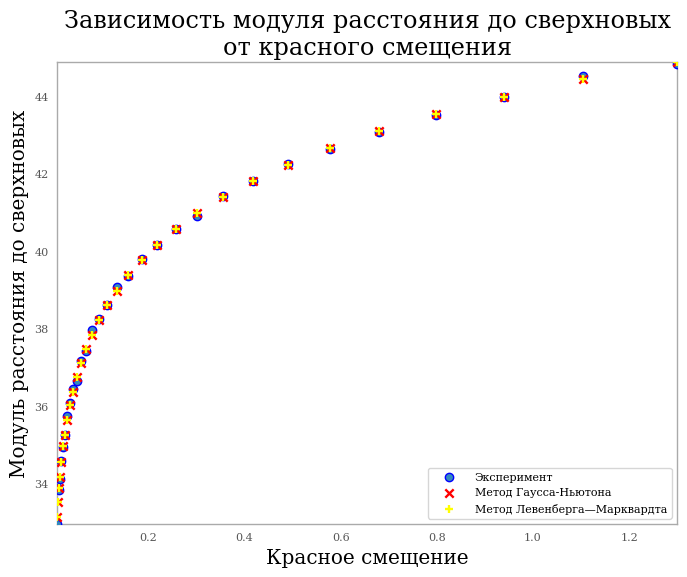

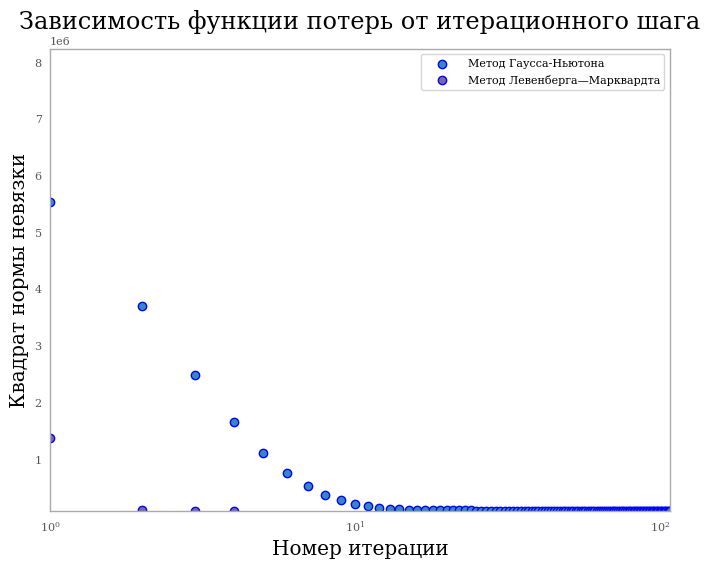

{'Gauss_Newton': {'H0': 71.32647535243636, 'Omega': 0.762056331085083, 'hfev': 109}, 'Levenberg-Marquardt': {'H0': 71.32647518248083, 'Omega': 0.7620563273997113, 'hfev': 5}}


In [ ]:

import numpy as np
from collections import namedtuple


Result = namedtuple('Result', ('nfev', 'cost', 'gradnorm', 'x'))
Result.__doc__ = """Результаты оптимизации

Attributes
----------
nfev : int
    Полное число вызовов модельной функции
cost : 1-d array
    Значения функции потерь 0.5 sum(y - f)^2 на каждом итерационном шаге.
    В случае метода Гаусса—Ньютона длина массива равна nfev, в случае ЛМ-метода
    длина массива — менее nfev
gradnorm : float
    Норма градиента на финальном итерационном шаге
x : 1-d array
    Финальное значение вектора, минимизирующего функцию потерь
"""


def gauss_newton(y, f, j, x0, k=1, tol=1e-4):
    dx = np.ones(len(x0))
    apprx = np.array(x0)
    cost = []
    grad, grad_norm = None, None
    i = 0
    while dx[np.abs(dx) > tol].size > 0:
        res = f(*apprx) - y
        cost.append(0.5 * np.dot(res, res))
        grad = np.dot(j(*apprx).T, res)
        grad_norm = np.sqrt(np.dot(grad, grad))
        dx = np.linalg.inv(j(*apprx).T @ j(*apprx)) @ j(*apprx).T @ res
        apprx -= k * dx
        i += 1
    return Result(i, cost, grad_norm, apprx)


def lm(y, f, j, x0, lmbd0=1e-2, nu=2, tol=1e-4):
    dx = np.ones(len(x0))
    apprx = np.array(x0)
    cost = []
    grad, grad_norm = None, None
    i = 0
    while dx[np.abs(dx) > tol].size > 0:
        res = f(*apprx) - y
        cost.append(0.5 * np.dot(res, res))
        grad = np.dot(j(*apprx).T, res)
        grad_norm = np.sqrt(np.dot(grad, grad))
        j_prod = j(*apprx).T @ j(*apprx)
        dx = np.linalg.inv(j_prod + lmbd0 * np.identity(np.shape(j_prod)[0]))\
            @ j(*apprx).T @ res
        dx_n = np.linalg.inv(j_prod + lmbd0 / nu *
                             np.identity(np.shape(j_prod)[0])) @ j(*apprx).T \
            @ res
        if np.any(f(*apprx) >= f(*(apprx - dx_n))):
            lmbd0 /= nu
            apprx -= dx_n
        elif np.any(f(*(apprx - dx)) <= f(*apprx) < f(*(apprx - dx_n))):
            apprx -= dx
        else:
            m = 1
            dx_m = np.linalg.inv(j_prod + lmbd0 * (nu ** m) *
                                 np.identity(np.shape(j_prod)[0])) \
                @ j(*apprx) @ res
            while f(*apprx) < f(*(apprx - dx_m)):
                m += 1
                dx_m = np.linalg.inv(j_prod + lmbd0 * (nu ** m) *
                                     np.identity(np.shape(j_prod)[0])) \
                    @ j(*apprx) @ res
            lmbd0 *= (nu ** m)
            apprx -= dx_m
        i += 1
    return Result(i, cost, grad_norm, apprx)






import numpy as np
from scipy import integrate
import json
from matplotlib import pyplot as plt


def d_func(hubble, omega):
    f_res = []
    for z_i in z:
        def dint(x): return 1 / np.sqrt((1 - omega) * (1 + x) ** 3 + omega)
        d_res = 3e5 * (1 + z_i) * integrate.quad(dint, 0, z_i)[0] / hubble
        f_res.append(d_res)
    return np.array(f_res)


def jacobian(hubble, omega):
    j_res = []
    for z_i in z:
        j_i_res = []
        def dint(x): return 1 / np.sqrt((1 - omega) * (1 + x) ** 3 + omega)

        def ddint(x):
            return ((x + 1) ** 3 - 1) / (2 * ((1 - omega) *
                                              (1 + x) ** 3 + omega) ** (3 / 2))
        j_i_res.append(-3e5 * (1 + z_i) * integrate.quad(dint, 0, z_i)[0] /
                       (hubble ** 2))
        j_i_res.append(3e5 * (1 + z_i) * integrate.quad(ddint, 0, z_i)[0] /
                       hubble)
        j_res.append(j_i_res)
    return np.array(j_res)


z = []
mu = []
with open('/content/drive/MyDrive/astronomy python/jla_mub.txt') as f:
    i = 0
    for line in f:
        if i != 0:
            z.append(float(line.split()[0]))
            mu.append(float(line.split()[1]))
        i += 1
d = np.power(10, (np.array(mu).astype('float32') + 5) / 5) / 1000000
x0 = [50, 0.5]
gn_res = gauss_newton(d, d_func, jacobian, x0, k=0.2, tol=1e-9)
lm_res = lm(d, d_func, jacobian, x0, nu=2)
json_data = {'Gauss_Newton': {'H0': gn_res[3][0], 'Omega': gn_res[3][1],
                              'hfev': gn_res[0]},
             'Levenberg-Marquardt': {'H0': lm_res[3][0], 'Omega': lm_res[3][1],
                                     'hfev': lm_res[0]}}
plt.scatter(z, mu, zorder=5, label='Эксперимент')
plt.scatter(z, 5 * np.log10(1e6 * d_func(gn_res[3][0], gn_res[3][1])) - 5,
            zorder=8, label='Метод Гаусса-Ньютона', marker='x',
            color='red')
plt.scatter(z, 5 * np.log10(1e6 * d_func(lm_res[3][0], lm_res[3][1])) - 5,
            zorder=8, label='Метод Левенберга—Марквардта', marker='+',
            color='yellow')
plt.title('Зависимость модуля расстояния до сверхновых'
          '\nот красного смещения')
plt.grid()
plt.xlabel('Красное смещение')
plt.ylabel('Модуль расстояния до сверхновых')
plt.legend(loc='lower right')
plt.show()
#plt.savefig('mu-z.png', dpi=1024)

plt.clf()
gn_cost = gn_res[1]
gn_x = np.arange(0, gn_res[0])
lm_cost = lm_res[1]
lm_x = np.arange(0, lm_res[0])
plt.scatter(gn_x, gn_cost, label='Метод Гаусса-Ньютона')
plt.scatter(lm_x, lm_cost, label='Метод Левенберга—Марквардта')
plt.title('Зависимость функции потерь от итерационного шага')
plt.xlabel('Номер итерации')
plt.xscale('log')
plt.ylabel('Квадрат нормы невязки')
plt.legend(loc='upper right')
plt.grid()
plt.legend()
plt.show()
#plt.savefig('cost.png', dpi=1024)

with open('parameters.json', 'w') as f2:
    f2.write(json.dumps(json_data, indent=4))
print(json_data)


## Random forest и вычисление красного смещения галактик

Алгоритм **случайного леса** использует ансамбль деревьев решений для решения задач классификации или регрессии. Он отличается от обычных деревьев решений тем, что вместо одного дерева строится множество деревьев, каждое из которых обучается на случайной подвыборке данных, а также использует случайный выбор признаков для построения каждого узла дерева. После построения всех деревьев они объединяются в ансамбль, результаты каждого дерева усредняются (в случае регрессии) или определяются голосованием большинства (в случае классификации). Этот подход повышает стабильность и обобщающую способность модели, делая ее менее склонной к переобучению и более точной на новых данных.


---



В данной задаче на основе файла *sdss_redshift.csv* с данными из обсерватории SDSS ([подробнее](ru.wikipedia.org/wiki/Слоановский_цифровой_небесный_обзор)) с известными красными смещениями (колонка `redshift`) и на данных фотометрии (колонки `u, g, r, i, z`) обучим наш случайный лес для предсказания красного смещения по данным фотометрии.

Фотометрическое наблюдение — это свертка спектра вашего объекта (то есть распределения энергии его излучения по частотам электро-магнитных волн) с фильтром частот. Таким образом получается поток F (эрг/с/см^2) — величина характеризуемая светимостью объекта и расстоянием до него: F = светимость / (4*π*d^2). Звездная величина — это логарифм потока: m ~ -2.5*lg(F), то есть она зависит как от светимости объекта, так и от расстояния до него. Разница звездных величин характерезует цвет объекта.

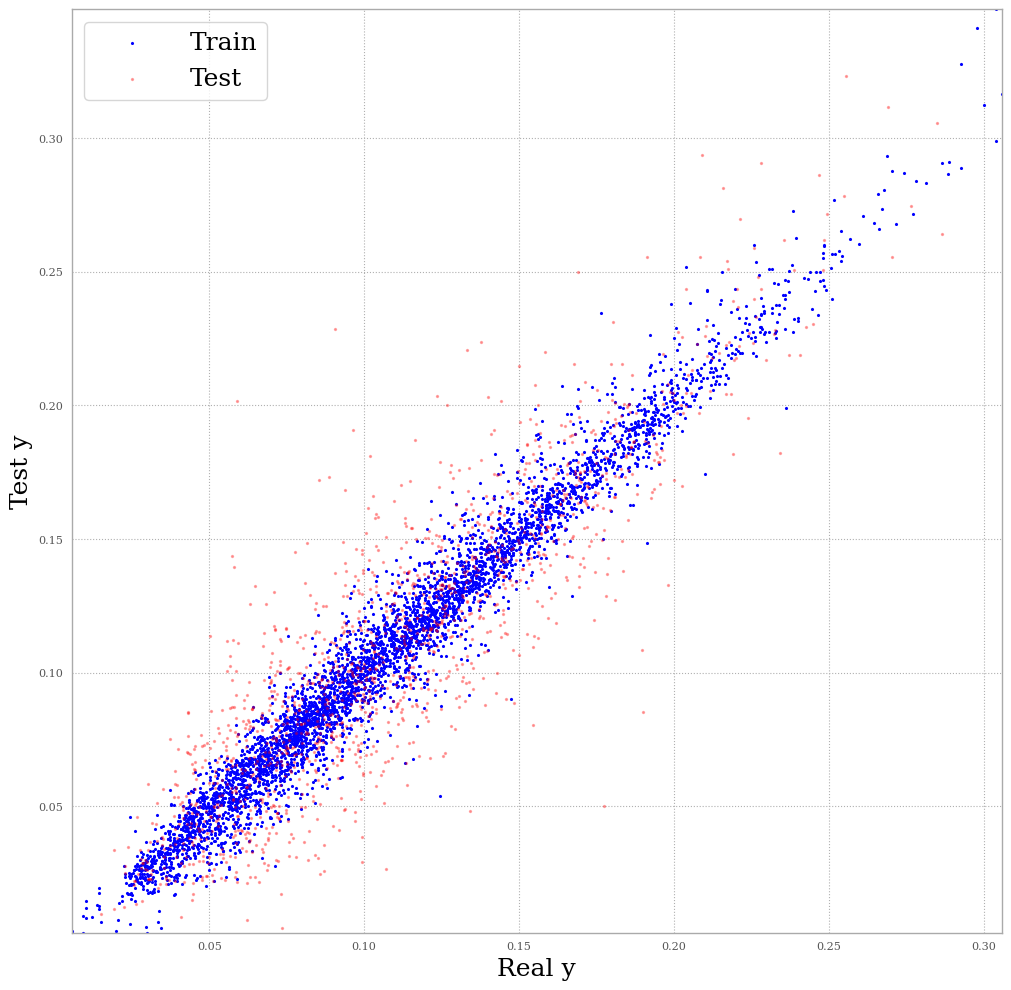

{"train": 0.01, "test": 0.026}


In [ ]:

#РЕШАЮЩЕЕ ДЕРЕВО

import numpy as np
from collections import namedtuple
from scipy import optimize


Leaf = namedtuple('Leaf', ('depth', 'y'))
Node = namedtuple('Node', ('depth', 'i', 'left', 'right', 'val'))

class Tree_base:
    def __init__(self, x, y, max_depth=45): #clss=0 --> node clss=1 --> leaf
        self.x = x
        self.y = y
        self.max_depth = max_depth
        self.tree = self.make_tree_new(self.x, self.y)

    def crit2 (self, val, xi, y):
        N = len(y)
        y_l = y[xi <= val]
        y_r = y[xi > val]
        return (len(y_l)/N * np.std(y_l) + len(y_r)/N * np.std(y_r))

    def optimal_split(self, x, y):
        arg = []
        for i in range(x.shape[1]):
            ar = optimize.minimize_scalar(lambda ar: self.crit2(ar, x[:, i], y), bounds=(np.min(x[:,i]), np.max(x[:,i])),method='Bounded')
            arg.append(ar)
        i_ans = np.argmin(list(map(lambda x: x.fun, arg)))
        val = arg[i_ans].x
        return i_ans, val

    def make_tree_new(self, x, y, depth=1, min_samples=5):
        if (depth < self.max_depth) and (len(y) > min_samples):
            i, val = self.optimal_split(x, y)
            left = self.make_tree_new(x[x[:, i]<=val], y[x[:, i] <= val], depth=depth+1)
            right = self.make_tree_new(x[x[:, i]>val], y[x[:, i] > val], depth=depth+1)
            return Node(depth, i, left, right, val)
        else:
            return Leaf(depth, y)

    def predict(self, x):
        y = np.empty(x.shape[0], dtype=self.y.dtype)
        for t, cord in enumerate(x):
            node = self.tree
            while not isinstance(node, Leaf):
                i = node.i
                if cord[i] >= node.val:
                    node = node.right
                else:
                    node = node.left
            y[t] = node.y.mean()
        return y


#СЛУЧАЙНЫЙ ЛЕС


from sklearn.model_selection import train_test_split
import numpy as np

class random_forest:
    def __init__(self, X, y, number=44, alpha=0.85):
        self.number = number
        self.alpha = alpha
        self.X = X
        self.y = y
        self.forest = self.bust_forest(self.X, self.y, number=self.number, alpha=self.alpha)

    def bust_forest(self, X, y, number=44, alpha=0.85):
        forest = []
        for i in (range(number)):
            X_train, _, y_train, _ = train_test_split(X, y, train_size=alpha, random_state=i)
            forest.append(Tree_base(np.array(X_train), y_train))
        return forest

    def predict(self, x):
        return np.mean(list(map(lambda t: t.predict(x), np.array(self.forest))), axis=0)





import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import json


dt = pd.read_csv('/content/drive/MyDrive/astronomy python/sdss_redshift.csv')
xf = np.array(dt.loc[:, 'u':'z'])
y = np.array(dt['redshift'])

X_train, X_test, y_train, y_test = train_test_split(xf, y, train_size=0.75, random_state=42)

forest = random_forest(X_train, y_train, number=15)
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

plt.figure(figsize=(12,12))
plt.scatter(y_pred_train, y_train, label="Train", marker='*', s=2)
plt.scatter(y_pred_test, y_test, label='Test', alpha=0.3, s=2, color='red')
plt.xlabel('Real y', fontsize=18)
plt.ylabel('Test y', fontsize=18)
plt.legend(fontsize=18)
#plt.savefig('redhift.png')
plt.show()

# save results
file = {"train": float('{:.3f}'.format(np.std((y_train - y_pred_train)))), "test": float('{:.3f}'.format(np.std((y_test - y_pred_test))))}
json_file = json.dumps(file)
with open("redhsift.json", "w") as outfile:
    outfile.write(json_file)
print(json_file)

data = pd.read_csv('/content/drive/MyDrive/astronomy python/sdss.csv')
X = np.array(data)
Y = forest.predict(X)
data['redshift'] = Y
data.to_csv('/content/drive/MyDrive/astronomy python/sdss_predict.csv')


## Расшифруем закодированный радиосигнал

В геофизике известно, что на масштабах до десятков метров воздух атмосферы Земли постоянно пребывает в турбулентном движении. Это означает, что известные из гидродинамики величины, такие как поля скоростей V, плотностей ρ и температур T, становятся теперь случайными полями. А значит, требуют описания в терминах статистических характеристик, например аналогичных автокорреляционной функции. Следствием случайности поля температуры T является случайность поля оптического показателя преломления n. Как известно, для воздуха n зависит от плотности ρ и температуры T.

На практике, величины этих постоянных пространственно-временных колебаний оптического показателя преломления n таковы, что оказывают принципиальное ограничивающие влияние на наземные оптические астрономические наблюдения. При экспозициях порядка нескольких миллисекунд можно пренебречь эволюцией случайного поля n во времени. Тогда в телескопе вместо дифракционного изображения бесконечно удаленного точечного источника света (коим является звезда), будет видна интерференционная картина вызванная неоднородностями показателя преломления n в атмосфере Земли. Характерные маленькие зёрна называются спеклами:

![спекл](https://drive.google.com/uc?export=view&id=1qISoKZ692z0UsWfPunK-TqTu9mPp6iF5)

При длительных экспозициях эта интерференционная картина замывается из-за эволюции во времени и изображение представляет из себя большое пятно:

![размытие](https://drive.google.com/uc?export=view&id=1sHKuICwoA9hkwrlpJZOiMi5C1sDWkasU)

На изображении выше — двойная двезда HD9165. Кажется, что разрешающая способность телескопа безнадежно испорчена атмосферой, однако, согласно законам оптики, для двух некогерентных точечных источников интерференционная картина на первом изображении должна "двоиться". Если бы нам удалось оценить двумерную автокорреляционную функцию мгновенных изображений спеклов, то по расстоянию между пиками мы могли бы оценить расстояние между двумя звездами. На подобной идее основан метод спекл-интерферометрии.

Что нам предстоит сделать:

1. откроем наши данные и создадим трёхмерный массив, где первое измерение соответствует номеру кадра, а остальные два — картинной плоскости.
   `data = fits.open('speckledata.fits')[2].data`
2. Вычислим усредненное по времени изображение и сохраним в файл `mean.png`
3. С помощью быстрого двумерного преобразования Фурье вычислим средний по времени спектр мощности изображений, сохраните его изображение в файл `fourier.png`
Спектром мощности случайного процесса называется квадрат модуля его преобразования Фурье.
4. Оценим и вычтем из среднего спектра мощности его среднюю шумовую подложку. Видно, что изображение среднего спектра мощности условно делится на две части окружностью, радиус которой соответствует так называемой частоте отсечения: внутри окружности частоты ниже, вне — выше. В данном случае частота отсечения примерно соответствует 50 пикс. Спектр мощности на частотах выше частоты отсечения в идеальном случае должен был бы быть равным нулю.
5. Нужно учесть эффект рассеяния света в однородной изотропной атмосфере (обычное молекулярное рассеяние известное из курса оптики). Так как рассеяние происходит изотропно и, следовательно, зависит только от модуля вектора пространственной частоты, удобно усреднить спектр мощности по всем углам и использовать результат для последующей нормировки.


---



Глобально мы здесь применяем **теорему Хинчина — Колмогорова**, которая гласит, что спектральной плотностью мощности стационарного в широком смысле случайного процесса является преобразование Фурье соответствующей автокорреляционной функции.

**Автокорреляционная функция** (ACF) - это мера взаимосвязи между значениями одного и того же случайного процесса в разные моменты времени. Она позволяет оценить степень корреляции между значениями ряда данных и его лагами (задержками или смещениями функции по ее аргументу).

Для временного ряда $X_t$ автокорреляционная функция в момент времени $k$ выражается как корреляция между $X_t$ и $X_{t-k}$, то есть:

$$
\text{ACF}(k) = \frac{\text{Cov}(X_t, X_{t-k})}{\sqrt{\text{Var}(X_t) \cdot \text{Var}(X_{t-k})}}
$$

где:

${Cov}(X_t, X_{t-k})$ - ковариация между $X_t$ и $X_{t-k}$,

${Var}(X_t)$ и $\text{Var}(X_{t-k})$ - дисперсии $X_t$ и $X_{t-k}$ соответственно. Может быть выражено через произведение стандартных отклонений $\sigma_t$ и $\sigma_{t+k}$

**Преобразование Фурье** - математический инструмент, позволяющий разложить сигнал на составляющие частоты, показывая, какие частоты присутствуют в сигнале, и с какой амплитудой.



In [ ]:

import numpy as np
import numpy.ma as ma
import json
from astropy.io import fits
from PIL import Image
from scipy import ndimage
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std
from matplotlib import pyplot as plt

data = fits.open('/content/drive/MyDrive/astronomy python/speckledata.fits')[2].data

# получаем среднее изображение
data_mean = np.sum(data, axis=0)
mval = np.max(data_mean)
contrast = 1/200
mean_img = Image.fromarray(data_mean)
img = Image.fromarray(data_mean*contrast).convert("L").resize((512, 512)).save('mean.png')

#делаем быстрое преобразование фурье
fdata = np.abs(np.fft.fftshift(np.fft.fft2(data, s=None, axes=(-2, -1)))**2)
img = Image.fromarray(np.sum(fdata, axis=0))
contrast = 1.5 * 10**-9
Image.fromarray(np.sum(fdata, axis=0)*contrast).convert("L").resize((512, 512)).save('fourier.png')

# делаем круговую маску
h, w = np.shape(img)
center = (int(w/2), int(h/2))
radius = 50
Y, X = np.ogrid[:h, :w]
mask = np.sqrt((X - center[0])**2 + (Y-center[1])**2) <= radius

# убираем шум в центральном круге
mnoize = np.mean(ma.masked_array(img, mask=mask))
img -= mnoize

# усредненяем значения по углам
img_rot = np.mean(list(map(lambda ang : ndimage.rotate(img, ang, reshape=False), np.linspace(-180, 180, 100))), axis=0)
contrast = 3 * 10**-9
Image.fromarray(img_rot*contrast).resize((512, 512)).convert("L").save('rotaver.png')

# оставим только центральную часть
crop_img = ma.masked_array(np.divide(img, img_rot), mask=np.logical_not(mask)).filled(0)

# применим быстрое обратное преобразование фурье и получим финал
final = (np.fft.ifftshift(np.fft.ifft2(crop_img)))
contrast = 5 * 10**3
n_mas = (np.abs(final)* contrast).astype('float64')
imgfinal = Image.fromarray(n_mas)
imgfinal.resize((512, 512)).convert("L").save('binary.png')

# найдем угловое расстояние
bkg_sigma = mad_std(n_mas)
daofind = DAOStarFinder(fwhm=4., threshold=3.*bkg_sigma)
sources = daofind(n_mas)
sources = sources.group_by('peak')
x = np.array(sources['xcentroid'][-2:])
y = np.array(sources['ycentroid'][-2:])
cord1, cord2 = zip(x, y)
cord2, cord1 = np.array(cord1), np.array(cord2)
cord3 = np.array([sources['xcentroid'][-3], sources['ycentroid'][-3]])
ang_len = np.sqrt(np.sum(((cord1 - cord2)**2 + (cord1 - cord3)**2)/2)) * 0.0206

# сохраним результаты
file = {}
file["distance"] = (float('{:.3f}'.format(ang_len)))
json_file = json.dumps(file)
with open("binary.json", "w") as outfile:
    outfile.write(json_file)
print(json_file)

#КАРТИНКИ ЗАГРУЗЯТСЯ В КЕШ НОУТБУКА!

{"distance": 0.124}


Результаты работы алгоритма вы так же можете найти в кеше программы!

## Восстановление параметров статистического распределения

В этом задании мы с вами будем восстанавливать параметры смешанных статистических распределений, используя два метода: метод максимального правдоподобия и EM-метод. Научным заданием будет выделение двух рассеянных скоплений [χ и h Персея](https://apod.nasa.gov/apod/ap091204.html) в звёздном поле.

Здесь мы реализуем два основных метода:

Метод максимального правдоподобия для смеси двух одномерных нормальных распределений. Напишем функцию `max_likelihood(x, tau, mu1, sigma1, mu2, sigma2, rtol=1e-3)`, где `x` — массив данных, остальные позиционные аргументы — начальные приближения для искомых параметров распределения, `rtol` — относительная точность поиска параметров, функция должна возвращать кортеж из параметров распределения в том же порядке, что и в сигнатуре функции.

EM-метод для смеси двух двумерных нормальных распределений — $\tau N(\mu_1, \Sigma_1) + (1-\tau) N(\mu_2, \Sigma_2)$

Напишем функцию `em_double_2d_gauss(x, tau, mu1, sigma1, mu2, sigma2, rtol=1e-3) `

$\tau$ (tau) — относительное количество звезд в скоплениях.

$\mu1$ (mu1) — двумерный вектор, средняя скорость звезд скоплений.
Диагональная матрица 2x2, элементы которой равны

$\sigma$ (sigma1). Разброс собственных движений звезд скоплений.

$\mu2$ (mu2) — двумерный вектор, средняя скорость звезд поля.
Диагональная матрица 2x2, элементы которой равны

$\sigma2$ (sigma2). Разброс собственных движений звезд поля.

Матрица вида:
$$\Sigma_i = \begin{bmatrix}
\sigma_i^2 & 0 \\\
0 & \sigma_i^2
\end{bmatrix}$$


Нам также понадобиться модуль [astroquery.gaia](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html) для того, чтобы загрузить координаты звёзд поля. Координаты центра двойного скопления `02h21m00s +57d07m42s`, используем поле размером `1.0 x 1.0` градус.

На выходе изобразим график рассеяния точек звёздного поля. Для каждой точки отметим цветом условную вероятность принадлежности к скоплениям (используем вычисленные параметры T). На графике рассеяния собственных движения (скоростей) обозначим скопления окружностью с центром в центре распределения и радиусом равным стандартном отклонению (корень из дисперсии).




---


Рассмотрим подкапотную математику в этой задачке. Итак первый инструмент:

**Метод максимального правдоподобия** (Maximum Likelihood Estimation, MLE) - это статистический метод, используемый для оценки параметров распределения вероятности на основе наблюдаемых данных. Основная идея метода заключается в том, чтобы найти такие значения параметров, при которых вероятность получить наблюдаемые данные максимальна, иными словами, мы максимизируем функцию правдоподобия.

**Функция правдоподобия** (likelihood function) - это статистическая функция, которая описывает вероятность получить конкретный набор наблюдений при заданных параметрах распределения вероятности или статистической модели.

Предположим, что у нас есть некоторый параметрический статистический модель, заданная совместная плотность вероятности $f(x;θ)$, где $x$ - наблюдаемые данные, а $θ$ - параметры модели. Цель состоит в том, чтобы найти такие значения параметров $θ$, при которых вероятность получить наблюдаемые данные максимальна.

Формально, задача состоит в максимизации функции правдоподобия $L(θ∣x)$, которая определяется как произведение вероятностей наблюдаемых данных $x$ при заданных параметрах $θ$:
$$
L(θ∣x)=f(x;θ)
$$
Часто проще работать с логарифмом функции правдоподобия, так как он преобразует произведение в сумму:
$$
logL(\theta|x)=\sum_{i=1}^{n}\log f(x_i;\theta)
$$
Таким образом, метод максимального правдоподобия заключается в поиске таких значений параметров $θ$, которые максимизируют логарифм функции правдоподобия.



---

Рассмотрим второй наш инструмент.

**EM-алгоритм** (англ. expectation-maximization) - алгоритм, используемый для нахождения оценок максимального правдоподобия параметров вероятностных моделей, в случае, когда модель зависит от некоторых скрытых переменных. Каждая итерация алгоритма состоит из двух шагов. На E-шаге (expectation) вычисляется ожидаемое значение функции правдоподобия, при этом скрытые переменные рассматриваются как наблюдаемые. На M-шаге (maximization) вычисляется оценка максимального правдоподобия, таким образом увеличивается ожидаемое правдоподобие, вычисляемое на E-шаге. Затем это значение используется для E-шага на следующей итерации. Алгоритм выполняется до сходимости.

Пусть дана вероятностная модель с параметрами $\theta$ и скрытыми переменными $z$, а $X$ — наблюдаемые переменные.

**E-шаг (Expectation Step)**: На этом шаге вычисляется ожидаемое значение логарифма функции правдоподобия $Q(\theta|\theta^{(t)})$ по текущим оценкам параметров $\theta^{(t)}$ при условии наблюдаемых данных $X$ и текущих значений скрытых переменных $Z$. Это выражение обозначается как $Q(\theta|\theta^{(t)})$ и вычисляется как:

$Q(\theta|\theta^{(t)}) = E_{Z|X,\theta^{(t)}}[\log L(\theta;X,Z)]$

**M-шаг (Maximization Step)**: На этом шаге выполняется максимизация функции $Q(\theta|\theta^{(t)})$ по параметрам $\theta$, что дает новые оценки параметров $\theta^{(t+1)}$. Формально это выражение записывается как:

$\theta^{(t+1)} = \underset{\theta}{\arg\max} \, Q(\theta | \theta^{(t)})$

где:

$θ$ - параметры модели.

$θ^{t}$ - текущие оценки параметров модели на итерации

$X$- наблюдаемые данные.

$Z$ - скрытые переменные.

$L(θ;X,Z)$ - функция правдоподобия модели.


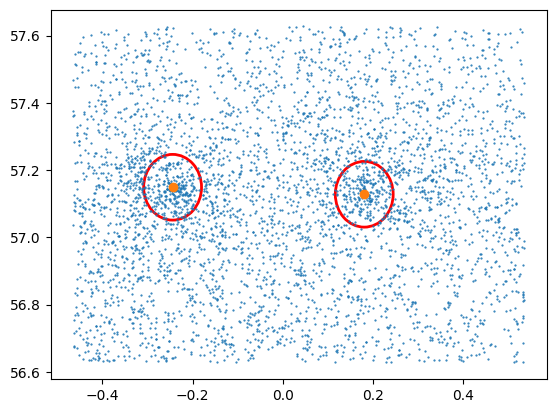

{'size ratio': 0.7042878026613708, 'motion': {'ra': -0.10233050409614629, 'dec': -2.1378433365916756}, 'cluster': [{'center': {'ra': -0.24437851391129722, 'dec': 57.148996201533386}}, {'center': {'ra': 0.18021495569992413, 'dec': 57.128110524298656}}]}


In [ ]:

import numpy as np
import scipy.stats as sps
from scipy import optimize

def norm_distribution(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*(x-mu)**2 / sigma**2))

def l_norm_distribution(x, tau, mu1, sigma1, mu2, sigma2):
        L = tau * norm_distribution(x, mu1, sigma1) + (1-tau) * norm_distribution(x, mu2, sigma2)
        return - np.sum(np.log(L))

def max_likelihood(x, tau, mu1, sigma1, mu2, sigma2, rtol=1e-3):
    init = np.array([tau, mu1, sigma1, mu2, sigma2])
    fun = lambda par: l_norm_distribution(x, *par)
    minimum2  = optimize.least_squares(fun, init, xtol=rtol, bounds=([0, -np.inf, 0, -np.inf, 0], [1, np.inf, np.inf, np.inf, np.inf]))
    return minimum2


def em_double_gauss(x, tau, mu1, sigma1, mu2, sigma2, rtol=1e-3):
    def tau_z(x, tau, mu1, mu2, sigma1, sigma2):
        T1 = tau * norm_distribution(x, mu1, sigma1)
        T2 = (1 - tau) * norm_distribution(x, mu2, sigma2)
        T_norm = T1 + T2
        T1 = np.divide(T1, T_norm, out=np.full_like(T1, 0.5), where=T_norm!=0)
        T2 = np.divide(T2, T_norm, out=np.full_like(T2, 0.5), where=T_norm!=0)
        return T1, T2

    def one_step_EM(x, tau, mu1, sigma1, mu2, sigma2):
        T1, T2 = tau_z(x, tau, mu1, sigma1, mu2, sigma2)
        tau_new = np.sum(T1)/np.sum(T1+T2)
        mu1_new = np.sum(T1*x)/np.sum(T1)
        mu2_new = np.sum(T2*x)/np.sum(T2)
        sigma1_new = np.sqrt(abs(np.sum(T1 * (x-mu1_new)**2)/np.sum(T1)))
        sigma2_new = np.sqrt(abs(np.sum(T2 * (x-mu2_new)**2)/np.sum(T2)))
        return np.array([tau_new, mu1_new, mu2_new, sigma1_new, sigma2_new])

    new = one_step_EM(x, tau, mu1, sigma1, mu2, sigma2)
    old = np.array([tau, mu1, sigma1, mu2, sigma2])
    while np.linalg.norm(new - old) > rtol:
        old = new
        new = one_step_EM(x, *old)
    return new

#реализация em-метода
def em_double_cluster(x, tau1, tau2, muv, mu1, mu2, sigma02, sigmax2, sigmav2, rtol=1e-5):
    def dnorm_distrebutaion(x, mu, sigma):
        dist = []
        for i in x:
            dist.append(sps.multivariate_normal(mean=mu, cov=sigma).pdf(i))
        return np.array(dist)

    def norm2(x, mu, sigma):
        ans = []
        for i in x:
            vec = (i - mu)
            ans.append(np.exp(-0.5 * vec.T @ np.linalg.inv(sigma) @ vec) / ((2 * np.pi)*np.sqrt(np.linalg.det(sigma))))
        return np.array(ans)

    def only_v(data):
        dv = []
        for i in data:
            dv.append(i[2:])
        return np.array(dv)

    def only_x(data):
        dx = []
        for i in data:
            dx.append(i[:2])
        return np.array(dx)

    def multiply(T, x):
        for i in range(len(x)):
            x[i] = x[i] * T[i]
        return x

    def Tall (x, tau1, tau2, muv, mu1, mu2, sigma02, sigmax2, sigmav2):
        T1 = tau1 * norm2(only_x(x), mu1, sigmax2) * norm2(only_v(x), muv, sigmav2)
        T2 = tau2 * norm2(only_x(x), mu2, sigmax2) * norm2(only_v(x), muv, sigmav2)
        T3 = (1 - tau1 - tau2) * norm2(only_v(x), [0, 0], sigma02)
        T_norm = T1 + T2 + T3
        T1 = np.divide(T1, T_norm, out=np.full_like(T1, 0.5), where=T_norm!=0)
        T2 = np.divide(T2, T_norm, out=np.full_like(T2, 0.5), where=T_norm!=0)
        T3 = np.divide(T3, T_norm, out=np.full_like(T3, 0.5), where=T_norm!=0)
        return T1, T2, T3


    def one_step_EM(x, tau1, tau2, muv, mu1, mu2, sigma02, sigmax2, sigmav2):
        T1, T2, T3 = Tall(x, tau1, tau2, muv, mu1, mu2, sigma02, sigmax2, sigmav2)
        tau1_new = np.sum(T1)/np.sum(T1+T2+T3)
        tau2_new = np.sum(T2)/np.sum(T1+T2+T3)
        mu1_new = (T1 @ x)/np.sum(T1)
        mu2_new = (T2 @ x)/np.sum(T2)
        mu1 = np.array(mu1_new)[:2]
        mu2 = np.array(mu2_new)[:2]
        muv = (mu1_new[2:] + mu2_new[2:])*0.5
        sigma1_new = (np.dot((x - mu1_new).T, multiply(T1, (x - mu1_new)))) / np.sum(T1)
        sigma2_new = (np.dot((x - mu2_new).T, multiply(T2, (x - mu2_new)))) / np.sum(T2)
        sigma3_new = (np.dot((only_v(x)).T, multiply(T3, only_v(x)))) / np.sum(T3)
        sigma02 = sigma3_new
        sigmax2 = 0.5 * (sigma1_new + sigma2_new)[0:2, 0:2]
        sigmav2 = 0.5 * (sigma1_new + sigma2_new)[2:, 2:]
        return np.array([tau1_new, tau2_new, muv, mu1, mu2, sigma02, sigmax2, sigmav2], dtype=object)

    def leng(x):
        s = 0
        for i in x:
            s += i**2
        return(np.sqrt(s))

    def stop(new, old, rtol):
        return not np.allclose([new[0], new[1], leng(new[2]), leng(new[3]), leng(new[4])], [old[0], old[1], leng(old[2]), leng(old[3]), leng(old[4])], rtol = rtol)

    new = one_step_EM(x, tau1, tau2, muv, mu1, mu2, sigma02, sigmax2, sigmav2)
    old = np.array([tau1, tau2, muv, mu1, mu2, sigma02, sigmax2, sigmav2], dtype=object)
    while stop(new, old, rtol=1e0):
        old = new
        new = one_step_EM(x, *old)
    return new

import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from matplotlib.patches import Ellipse
import json


def to_ra(x, dec_):
    return x/np.cos(dec_/180 * np.pi) + ra.mean()

def circle(sigma, cx, cy):
    angle = np.linspace( 0 , 2 * np.pi , 150 )
    x = np.sqrt(sigma[0,0]) * np.cos( angle ) - cx
    y = np.sqrt(sigma[1,1]) * np.sin( angle ) - cy
    return x, y

center_coord = SkyCoord('02h21m00s +57d07m42s')
vizier = Vizier(
  columns=['RAJ2000', 'DEJ2000', 'pmRA', 'pmDE'],
  column_filters={'BPmag': '<16', 'pmRA': '!=', 'pmDE': '!='}, # число больше — звезд больше
  row_limit=10000
)
stars = vizier.query_region(
  center_coord,
  width=1.0 * u.deg,
  height=1.0 * u.deg,
  catalog=['I/350'], # Gaia EDR3
)[0]

ra = stars['RAJ2000']._data  # прямое восхождение, аналог долготы
dec = stars['DEJ2000']._data  # склонение, аналог широты
x1 = (ra - ra.mean()) * np.cos(dec / 180 * np.pi)
x2 = dec
v1 = stars['pmRA']._data
v2 = stars['pmDE']._data

tau10 = tau20 =  0.3
muv0 = np.array([-0.75/2, -1.2/2])
mu10 = np.array([-0.25, 58])
mu20 = np.array([0.2, 57.1])
sigma020 = [[5,0], [0, 3]] #[[np.cov(np.vstack((x1,x2)))[0,0], 0], [0, np.cov(np.vstack((x1,x2)))[1,1]]]
sigmax20 = [[0.023,0], [0, 0.3]] #np.cov(np.vstack((v1,v2)))#
sigmav20 = [[2,0], [0, 4]] #np.cov(np.vstack((v1,v2)))#

data = np.array(list(zip(x1, x2, v1, v2)))
answer = em_double_cluster(data, tau10, tau20, muv0, mu10, mu20, sigma020,  sigmax20, sigmav20)
tau1, tau2 = answer[:2]
muv = answer[2]
mu1 = answer[3]
mu2 = answer[4]

plt.figure()
ax = plt.gca()
    #
ellipse1 = Ellipse(xy=(answer[3][0], answer[3][1]), width=np.sqrt(answer[6][0,0]), height=np.sqrt(answer[6][1,1]), edgecolor='r', fc='None', lw=2)
ellipse2 = Ellipse(xy=(answer[4][0], answer[4][1]), width=np.sqrt(answer[6][0,0]), height=np.sqrt(answer[6][1,1]), edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse1)
ax.add_patch(ellipse2)
plt.scatter(x1, x2, s=0.3)
plt.scatter([answer[3][0], answer[4][0]], [answer[3][1], answer[4][1]])
plt.savefig('per.png')
plt.show()

file = {"size ratio": tau1/tau2,
         "motion": {"ra": muv[0], "dec": muv[1]},
         "cluster":[
         { "center": {"ra": mu1[0], "dec": mu1[1]}},
         { "center": {"ra": mu2[0], "dec": mu2[1]} } ]
}
with open("per.json", "w") as f:
    f.write(json.dumps(file, indent = 1))
print(file)

## И наконец займемся астрокоординатами!

В этом примере мы с вами рассмотрим, как пакет `astropy.coordinates` может быть использован для представления и преобразования астрономических координат, имеющих связанные данные о скорости. Вам может быть полезно держать открытой документацию [здесь](http://docs.astropy.org/en/stable/coordinates/index.html) `Astropy` для пакета `coordinates` наряду с этим заданием.

Объект `SkyCoord` может использоваться для хранения скаляров или массивов о позиционных координатах и поддерживает преобразование между различными системами координат и представлениями. Однако `astropy.coordinates` также поддерживает представление и преобразование информации о скорости вместе с позициями.

Компоненты скорости передаются в `SkyCoord` так же, как задаются компоненты позиции: как аргументы для класса `SkyCoord`. Например, чтобы создать `SkyCoord` для представления позиции на небе и собственного движения в (по умолчанию) ICRS системе координат, кроме компонентов позиции `ra, dec,` мы можем передать значения для компонентов собственного движения `pm_ra_cosdec, pm_dec` ("pm" означает "собственное движение")

**Эволюция координатных позиций между эпохами**

Для близких или быстро движущихся звёзд позиция звезды может значительно измениться между двумя хорошо разнесенными наблюдениями источника. В таких случаях может потребоваться вычислить позицию звезды в определенное время, используя собственное движение или скорость звезды. Давайте продемонстрируем эту идею, сравнив позицию на небе источника, измеренную в релизе данных `Gaia Data Release 2` (для эпохи `J2015.5`), с изображением рядом с этим источником из Digitized Sky Survey (DSS; цифровые сканы фотографических пластин, снятых в 1950-х годах).

Из предыдущих астрометрических измерений мы знаем, что у звезды HD 219829 очень большое собственное движение: почти 0,5 угловых секунд в год! Между DSS и Gaia мы, следовательно, ожидаем, что позиция звезды изменится примерно на 0,5 угловой минуты. Давайте посмотрим, так ли это!

Для начала мы запросим каталог `Gaia`, чтобы получить данные для этой звезды. Мы используем большой радиус поиска, чтобы много источников было возвращено.

`hd219829_coord = SkyCoord(
    ra=hd219829_row['ra'],
    dec=hd219829_row['dec'],
    distance=Distance(parallax=hd219829_row['parallax']),
    pm_ra_cosdec=hd219829_row['pmra'],
    pm_dec=hd219829_row['pmdec'],
    obstime=Time(hd219829_row['ref_epoch'], format='jyear'))`

Теперь у нас есть представление SkyCoord о положении и собственном движении звезды HD 219829, измеренное Gaia и сообщенное в эпоху J2015.5. Что именно это означает? Gaia фактически измеряет (зависящее от времени) положение звезды каждый раз, когда она сканирует часть неба, содержащую источник, и именно так Gaia может измерять собственные движения звезд. Однако, если каждая звезда движется и меняет свое положение на небе, как мы можем говорить о «положении звезды на небе» в отличие от «траектории звезды на небе»?! Ключевым моментом является то, что каталоги часто сообщают только о положении источника в некоторый опорный момент времени. Для обзора, в котором небо наблюдается только один или несколько раз (например, SDSS или 2MASS), этот опорный момент времени может быть «временем наблюдения звезды». Но для такой миссии, как Gaia, которая много раз сканирует небо, они выполняют астрометрическую подгонку к индивидуальным измерениям положения, что позволяет им измерять параллакс, собственное движение и опорное положение в опорное время для каждого источника. Для второго выпуска данных Gaia опорное время — J2015.5, а положения неба (и другие величины), указанные в каталоге для каждого источника, относятся к этой эпохе.

В SkyCoord мы указываем «эпоху» наблюдения, используя аргумент obstime, как мы делали выше. Теперь, когда у нас есть координаты объекта HD 219829, давайте сравним положение звезды, измеренное Gaia, с ее видимым положением на изображении, полученном DSS.

Самая яркая звезда (наблюденная DSS) на этом изображении — наша цель, а красный кружок — место, где Gaia наблюдала эту звезду. Как мы и ожидали, с 1950-х годов он значительно изменился! Мы можем объяснить это движение и предсказать положение звезды примерно в то время, когда была снята фотометрия. Предположим, что эту фотометрию мы снимали точно в 1950 году.

Чтобы учесть правильное движение источника и изменить положение до нового времени, мы можем использовать метод `SkyCoord.apply_space_motion()`.


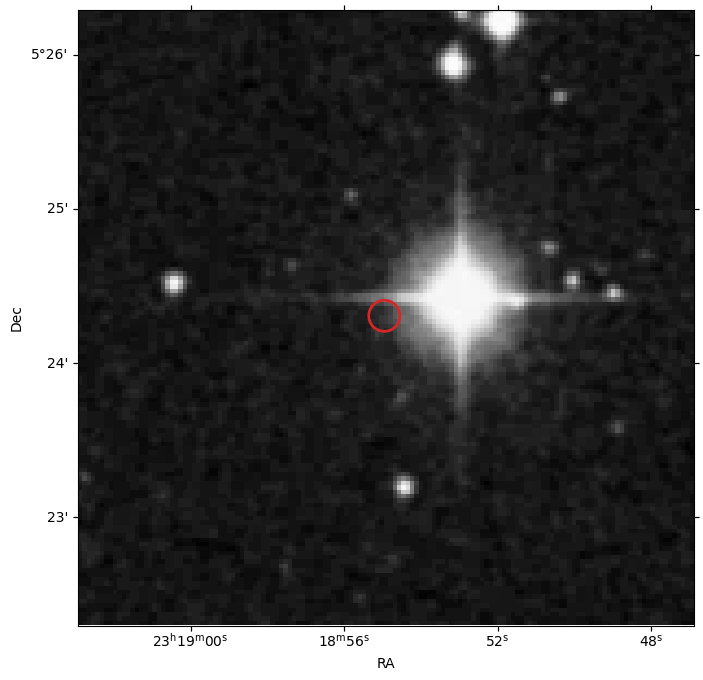

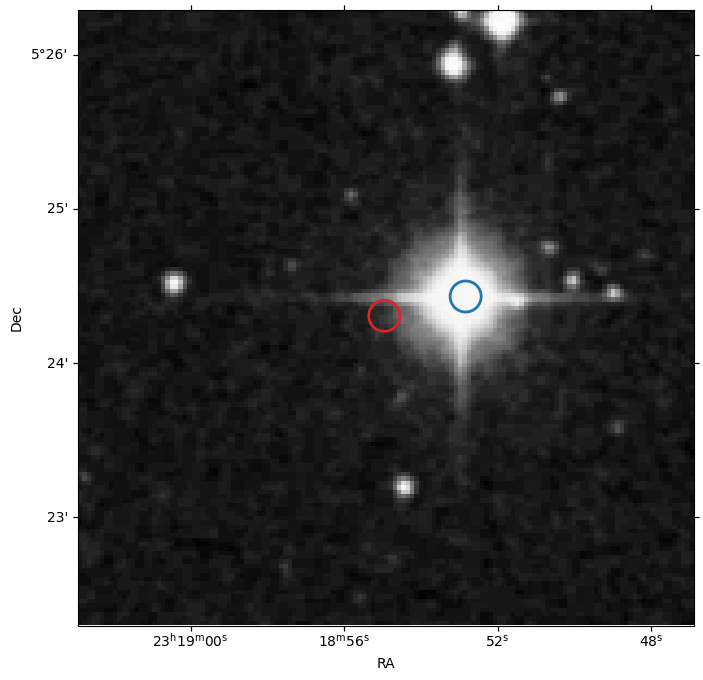

In [ ]:
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from astropy import units as u
from astropy.coordinates import SkyCoord, Distance, Galactic
import astropy.coordinates as coord
from astropy.io import fits
from astropy.table import QTable
from astropy.time import Time
from astropy.utils.data import download_file
from astropy.wcs import WCS

from astroquery.gaia import Gaia


SkyCoord(
    ra=10*u.deg,
    dec=20*u.deg,
    pm_ra_cosdec=1*u.mas/u.yr,
    pm_dec=2*u.mas/u.yr)

gaia_tbl = Gaia.query_object(SkyCoord.from_name('HD 219829'), radius=1*u.arcmin)

with warnings.catch_warnings():
    warnings.simplefilter('ignore', UserWarning)

    gaia_tbl = QTable.read('/content/drive/MyDrive/astronomy python/HD_219829_query_results.ecsv')

hd219829_row = gaia_tbl[gaia_tbl['phot_g_mean_mag'].argmin()]
hd219829_row['source_id', 'pmra', 'pmdec']

hd219829_coord = SkyCoord(
    ra=hd219829_row['ra'],
    dec=hd219829_row['dec'],
    distance=Distance(parallax=hd219829_row['parallax']),
    pm_ra_cosdec=hd219829_row['pmra'],
    pm_dec=hd219829_row['pmdec'],
    obstime=Time(hd219829_row['ref_epoch'], format='jyear'))

hd219829_coord

dss_cutout_filename = download_file(
    f"http://archive.stsci.edu/cgi-bin/dss_search?"
    f"f=FITS&ra={hd219829_coord.ra.degree}&dec={hd219829_coord.dec.degree}"
    f"&width=4&height=4")  # width/height in arcmin


dss_cutout_filename = '/content/drive/MyDrive/astronomy python/dss_hd219829.fits'

hdu = fits.open(dss_cutout_filename)[0]
wcs = WCS(hdu.header)

fig, ax = plt.subplots(1, 1, figsize=(8, 8),
                       subplot_kw=dict(projection=wcs))
ax.imshow(hdu.data, origin='lower', cmap='Greys_r')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_autoscale_on(False)

ax.scatter(hd219829_coord.ra.degree,
           hd219829_coord.dec.degree,
           s=500,
           transform=ax.get_transform('world'),
           facecolor='none', linewidth=2, color='tab:red')

hd219829_coord.obstime

with warnings.catch_warnings():
    warnings.simplefilter('ignore', UserWarning)

    hd219829_coord_1950 = hd219829_coord.apply_space_motion(
        new_obstime=Time('J1950'))

fig, ax = plt.subplots(1, 1, figsize=(8, 8),
                       subplot_kw=dict(projection=wcs))
ax.imshow(hdu.data, origin='lower', cmap='Greys_r')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_autoscale_on(False)

ax.scatter(hd219829_coord.ra.degree,
           hd219829_coord.dec.degree,
           s=500,
           transform=ax.get_transform('world'),
           facecolor='none', linewidth=2, color='tab:red')

# Построим предсказанную (прошлую) позицию:
ax.scatter(hd219829_coord_1950.ra.degree,
           hd219829_coord_1950.dec.degree,
           s=500,
           transform=ax.get_transform('world'),
           facecolor='none', linewidth=2, color='tab:blue')

#Красный кружок такой же, как на предыдущем изображении, и
#показывает положение источника в каталоге Gaia (в 2015.5).
#Синий кружок показывает наше предсказание положения источника в
#1950 году – оно выглядит намного ближе к тому месту, где находится звезда на изображении DSS!

Красный кружок такой же, как на предыдущем изображении, и показывает положение источника в каталоге Gaia (в 2015.5). Синий кружок показывает наше предсказание положения источника в 1950 году – оно находится намного ближе к тому месту, где находится звезда на изображении DSS!

В этом уроке мы рассказали, как хранить и преобразовывать данные скорости вместе с данными о положении в `astropy.coordinates`. Мы также продемонстрировали, как использовать скорость источника для прогнозирования его положения в более раннее или позднее время.